# CS109A - Final Project - Milestone 3

# Canvas Group - Final Project # 150

# Group Members - Akhil Srivastava, Han Truong, Yuying Qian

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from pandas.plotting import register_matplotlib_converters

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
register_matplotlib_converters()

# Used to parse 'Date Time' column values as pandas DatetimeIndex
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

# Exploratory Data Analysis

In [25]:
def read_data(file_name):
    # Read the file and parse 'Date' column values as pandas DatetimeIndex
    df = pd.read_csv(file_name, parse_dates=['Date'], date_parser=dateparse)

    # Set 'Date' column as index
    df.set_index('Date', inplace=True)

    # Drop 'Adj Close' and 'Volume' columns as they are not needed
    df = df.drop(['Adj Close', 'Volume'], 1) 
    
    return df

def describe_and_peek(df, security_name):
    print("\nNumber of observations:", len(df.index), "\n")
    print("Are there any missing values:", "Yes." if df.isnull().values.any() else "No.", "\n")
    print(security_name, "- Vital Stats\n\n", df.describe(), "\n")
    print(security_name, "- Top Rows\n\n", df.head(), "\n")
    print(security_name, "- Bottom Rows\n\n", df.tail(), "\n")

# Display Price Charts
def display_charts(df, security_name, price_type):
    for column in df.columns:
        plt.figure(figsize=(16, 6))
        plt.plot(df.index, df[column], "-o", ms='1', color=np.random.rand(3,))
        plt.title(security_name + " Daily " + column + " " + price_type + " (USD)", fontsize=18)
        plt.xlabel("Date", fontsize=15)
        plt.ylabel(column + " " + price_type + " (USD)", fontsize=15)
        plt.grid(True);

# Display ACF and PACF Charts
def plot_acf_pacf(df, security_name, price_type):    
    h_max = 60    
    title =  "ACF and PACF of " + security_name + " Daily " + price_type
    columns = df.columns.values

    fig, ax = plt.subplots(nrows=len(columns), ncols=2, sharex=False, figsize=(18, 7*len(columns)))
    fig.suptitle(title, y=0.91, size=18)
    plt.subplots_adjust(wspace = 0.13, hspace = 0.3)
    
    for i in range(len(columns)):
        plot_acf(df[columns[i]], ax=ax[i, 0], lags=h_max, color='crimson')
        ax[i, 0].set_xlabel("lag", fontsize=15)
        ax[i, 0].set_ylabel("ACF", fontsize=15)
        ax[i, 0].set_title("ACF of " + columns[i] + " " + price_type, fontsize=15)
        ax[i, 0].grid(True)

        plot_pacf(df[columns[i]], ax=ax[i, 1], lags=h_max, color='lightseagreen')
        ax[i, 1].set_xlabel("lag", fontsize=15)
        ax[i, 0].set_ylabel("PACF", fontsize=15)
        ax[i, 1].set_title("PACF of " + columns[i] + " " + price_type, fontsize=15)
        ax[i, 1].grid(True)
    
    plt.show()

In [26]:
security_list = ['Apple Stock', 'Amazon Stock', 'Microsoft Stock', 'S&P 500 Index', 'Nasdaq 100 Index']
file_list = ['AAPL.csv', 'AMZN.csv', 'MSFT.csv', '^GSPC.csv', '^IXIC.csv']
data_dir = './yahoo_full_data/'

# Number of past values to be used for prediction
window_size = 60


************************ Processing Apple Stock ************************

Number of observations: 10067 

Are there any missing values: No. 

Apple Stock - Vital Stats

                Open          High           Low         Close
count  10067.000000  10067.000000  10067.000000  10067.000000
mean       9.566114      9.668800      9.461608      9.569016
std       18.471913     18.687419     18.250637     18.478591
min        0.049665      0.049665      0.049107      0.049107
25%        0.271596      0.277880      0.265625      0.271138
50%        0.439732      0.448661      0.433036      0.441786
75%       11.201429     11.283929     11.095893     11.241786
max      137.589996    137.979996    130.529999    134.179993 

Apple Stock - Top Rows

                 Open      High       Low     Close
Date                                              
1980-12-12  0.128348  0.128906  0.128348  0.128348
1980-12-15  0.122210  0.122210  0.121652  0.121652
1980-12-16  0.113281  0.113281  0.112723

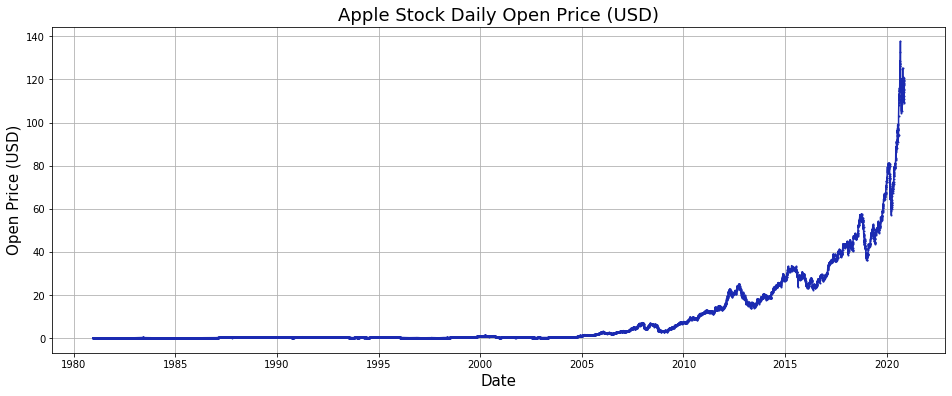

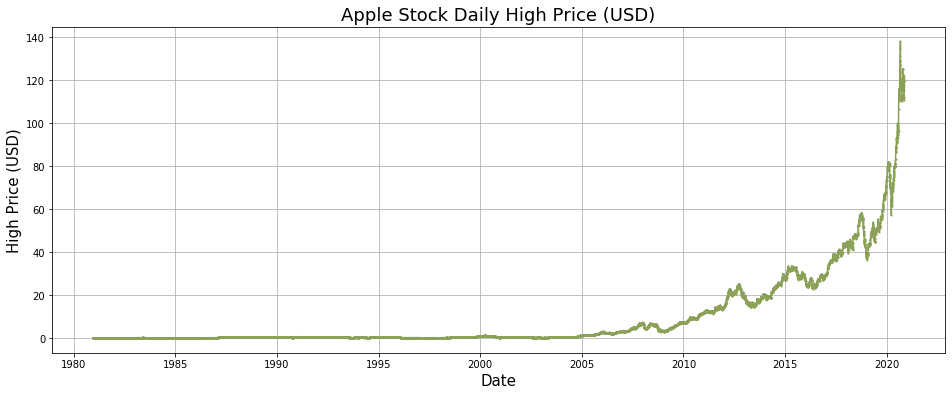

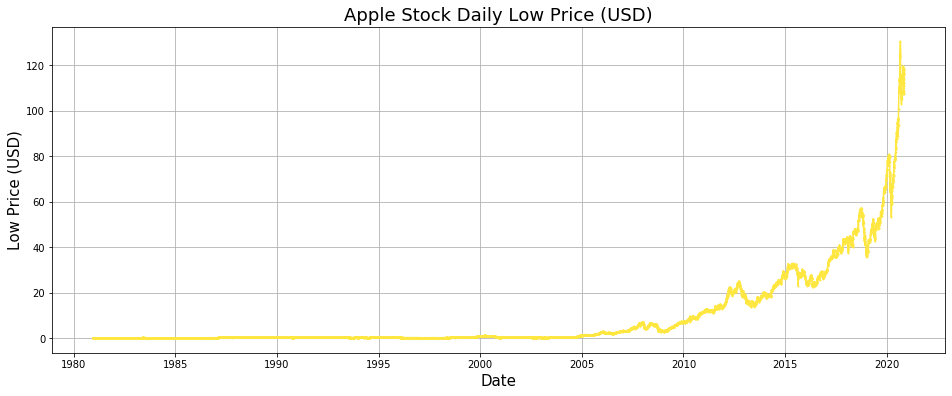

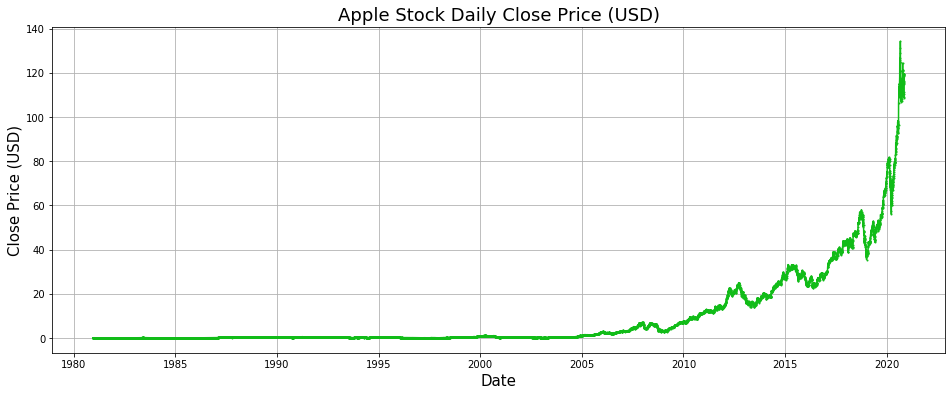

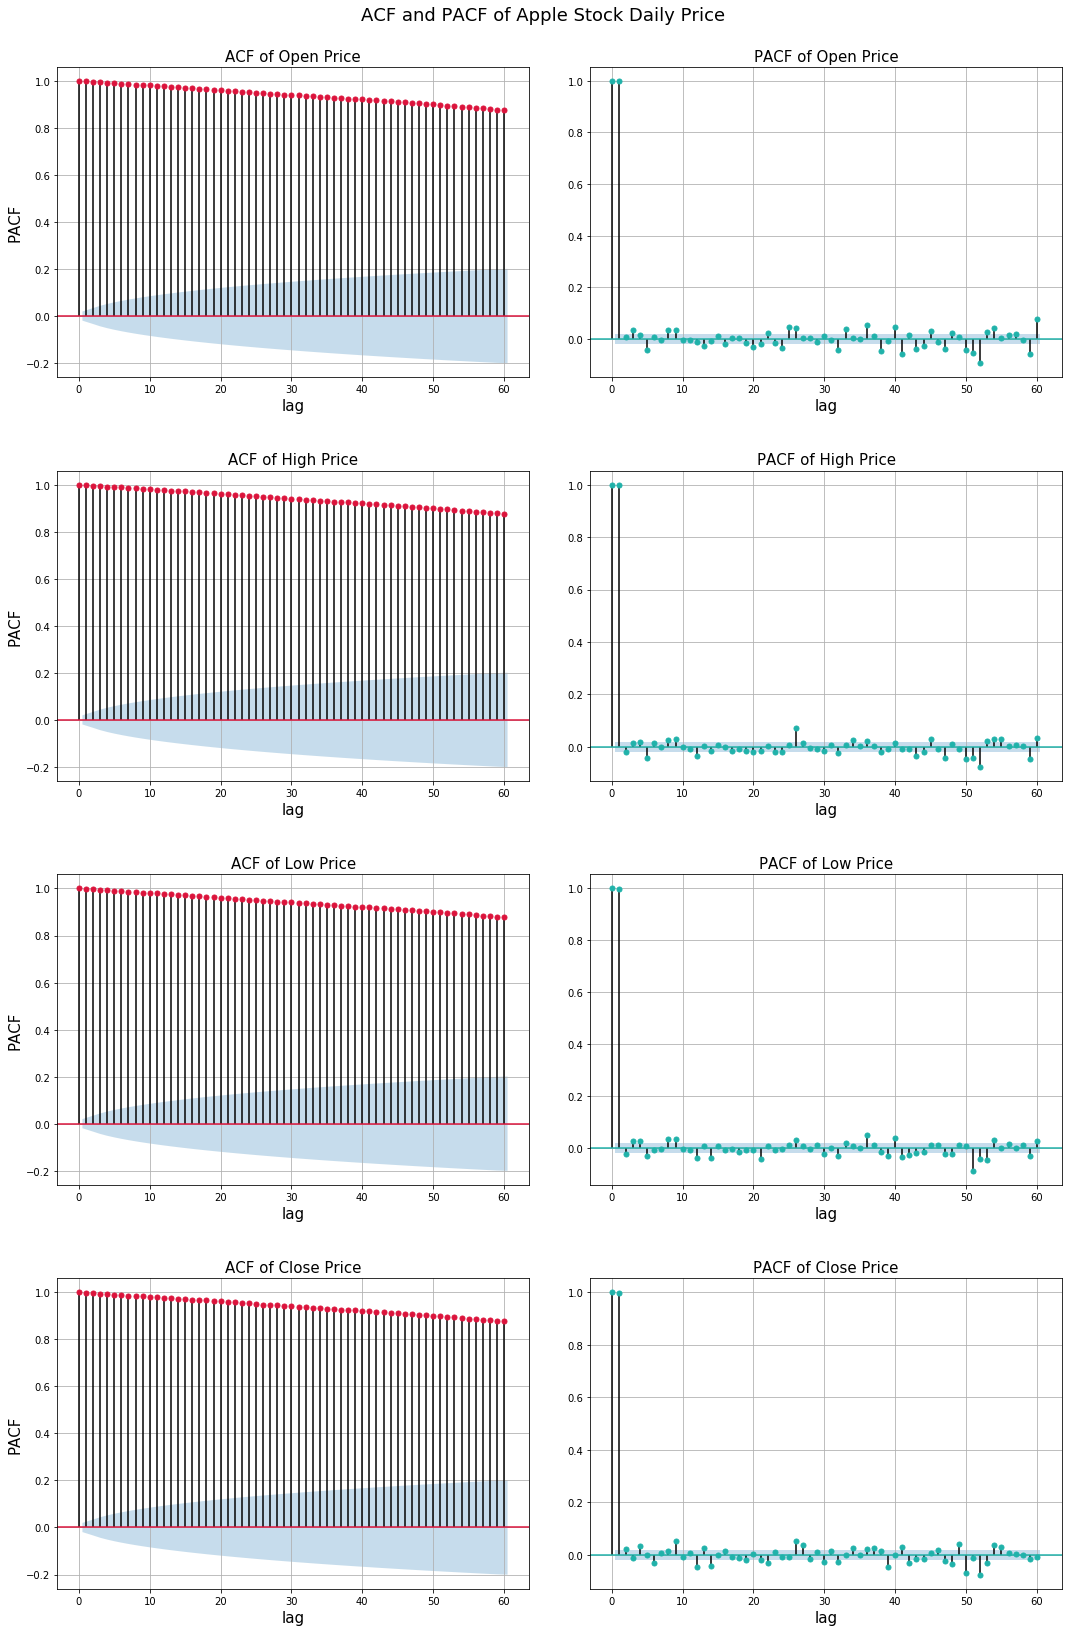

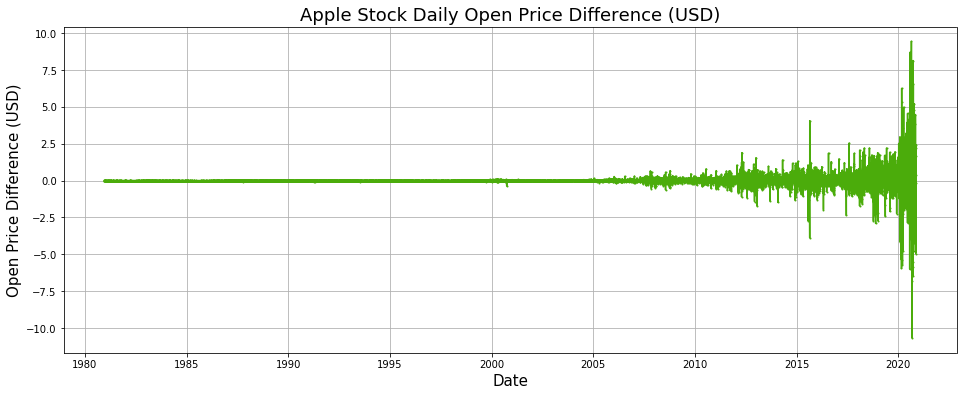

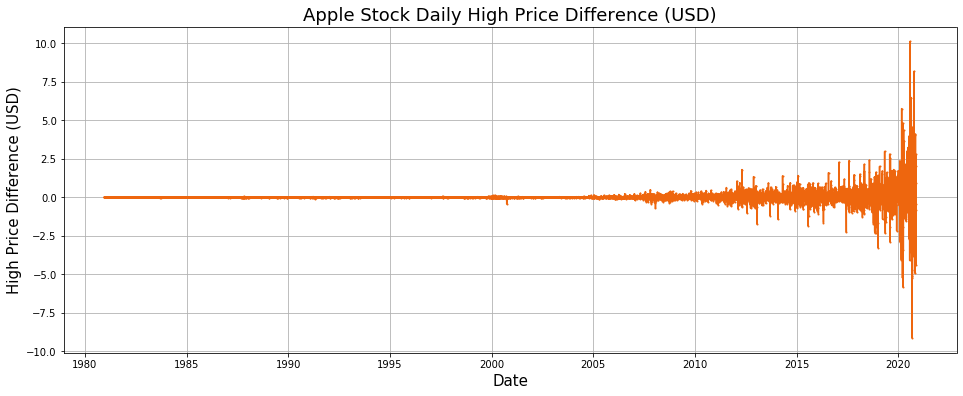

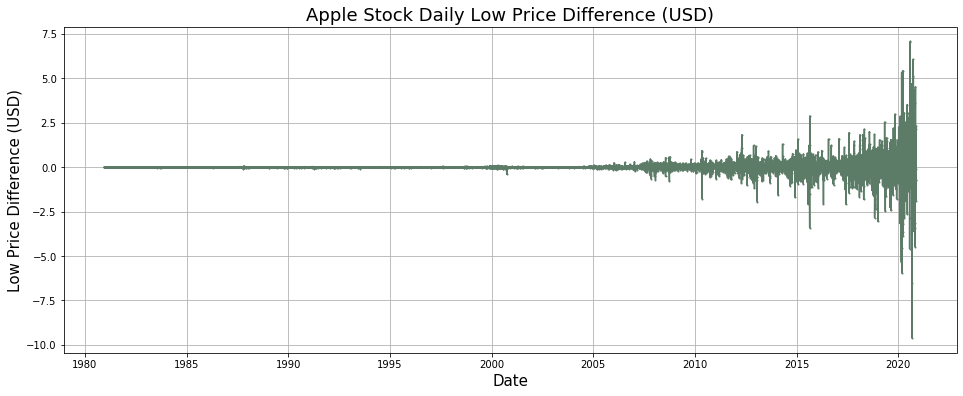

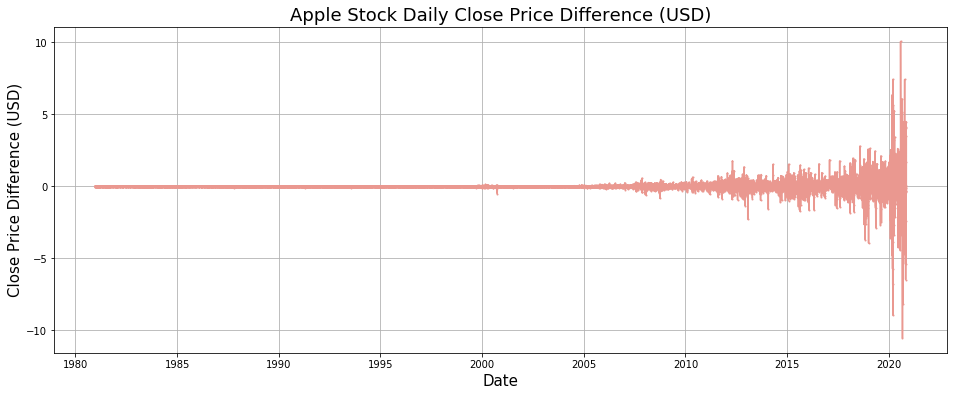

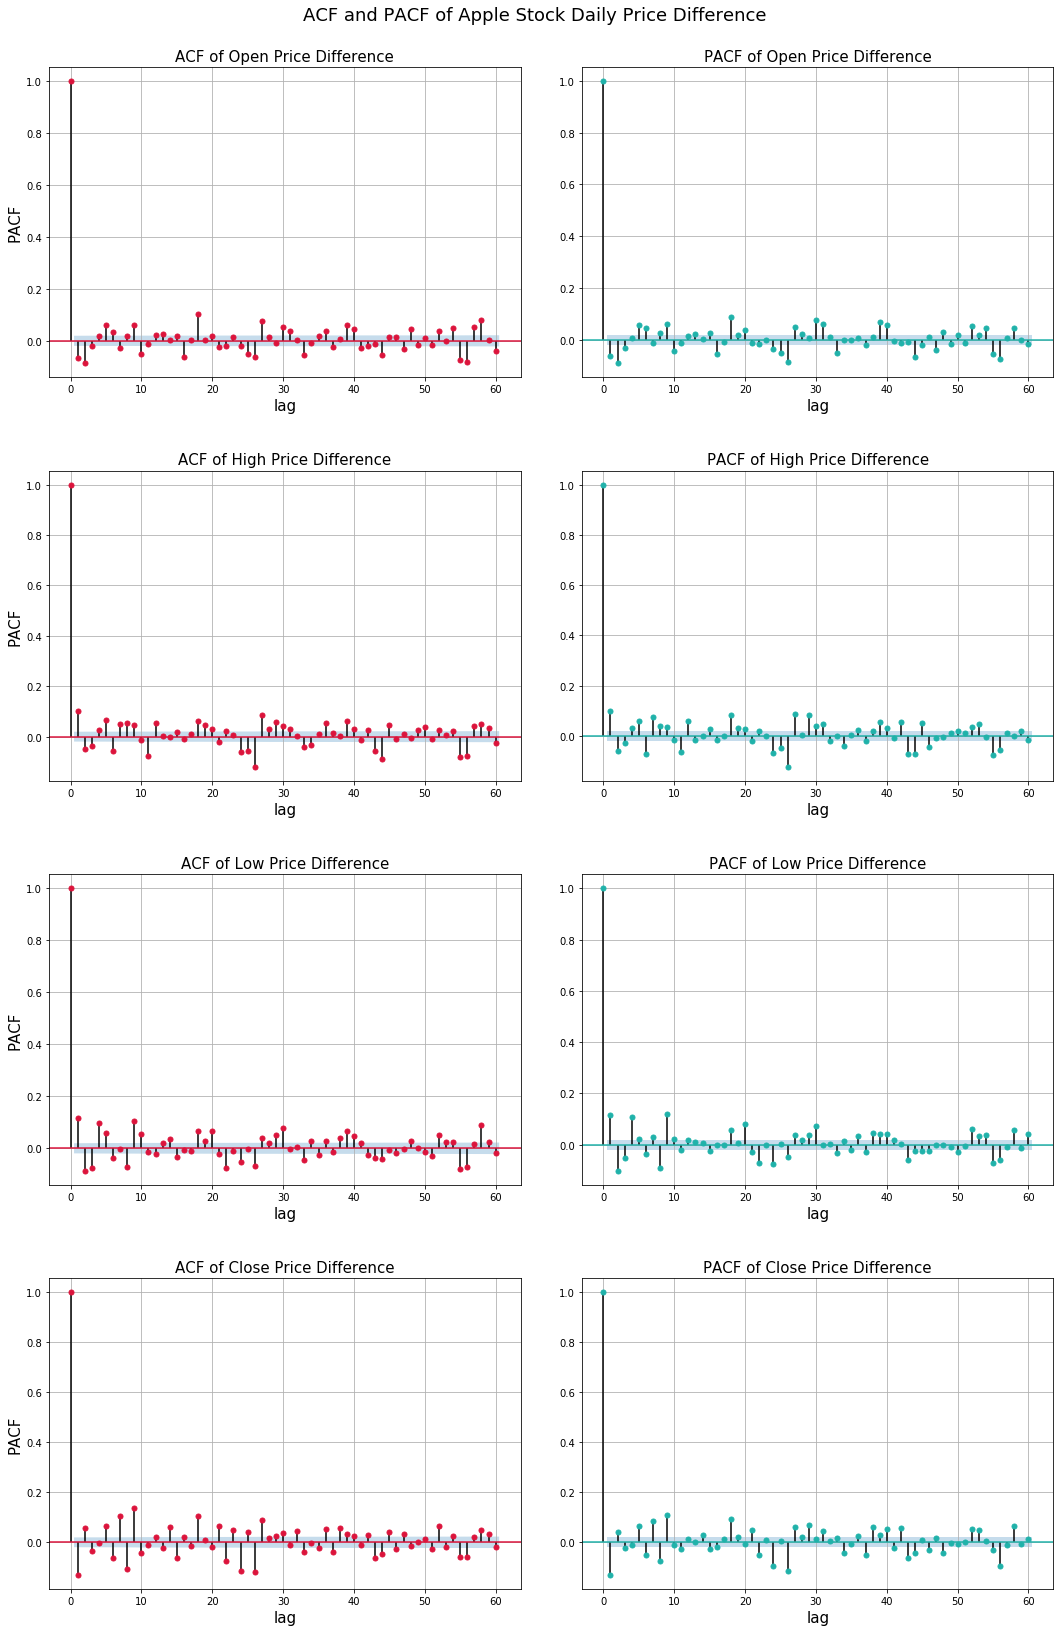


************************ Processing Amazon Stock ************************

Number of observations: 5916 

Are there any missing values: No. 

Amazon Stock - Vital Stats

               Open         High          Low        Close
count  5916.000000  5916.000000  5916.000000  5916.000000
mean    408.225350   412.911121   403.013016   408.173076
std     662.126126   669.533572   653.465739   661.773915
min       1.406250     1.447917     1.312500     1.395833
25%      38.145002    38.840000    37.490000    38.164999
50%      84.970001    86.604999    83.174999    84.933750
75%     375.307510   379.077499   372.925003   375.140015
max    3547.000000  3552.250000  3486.689941  3531.449951 

Amazon Stock - Top Rows

                 Open      High       Low     Close
Date                                              
1997-05-15  2.437500  2.500000  1.927083  1.958333
1997-05-16  1.968750  1.979167  1.708333  1.729167
1997-05-19  1.760417  1.770833  1.625000  1.708333
1997-05-20  1.729167  1

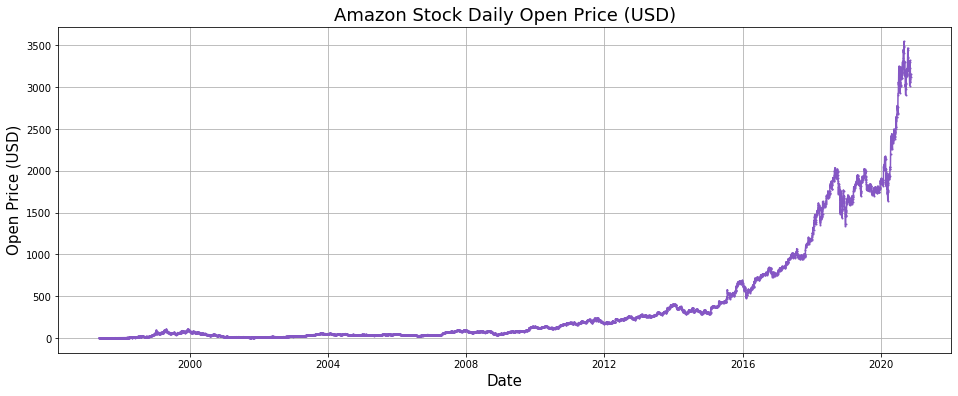

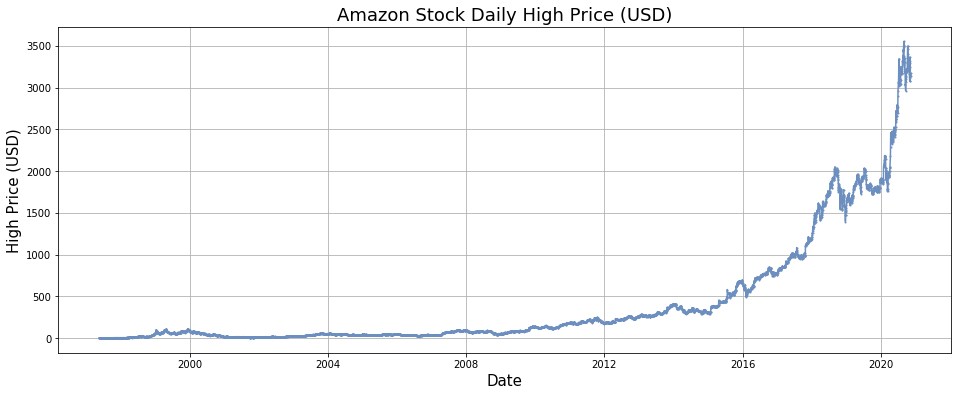

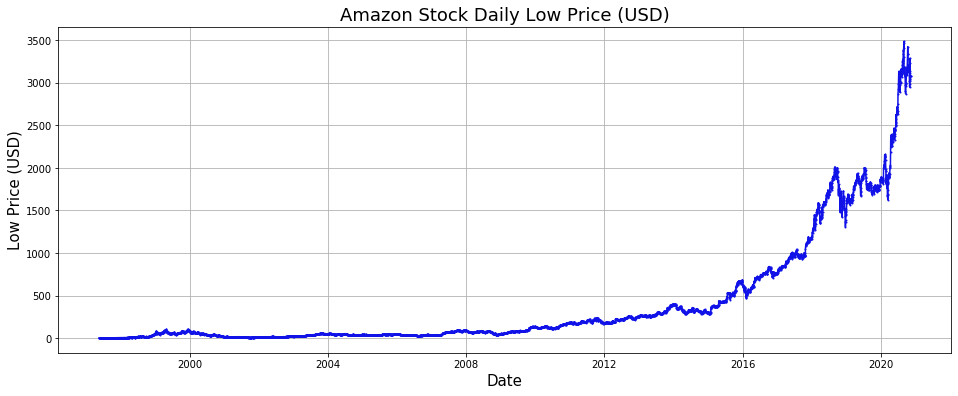

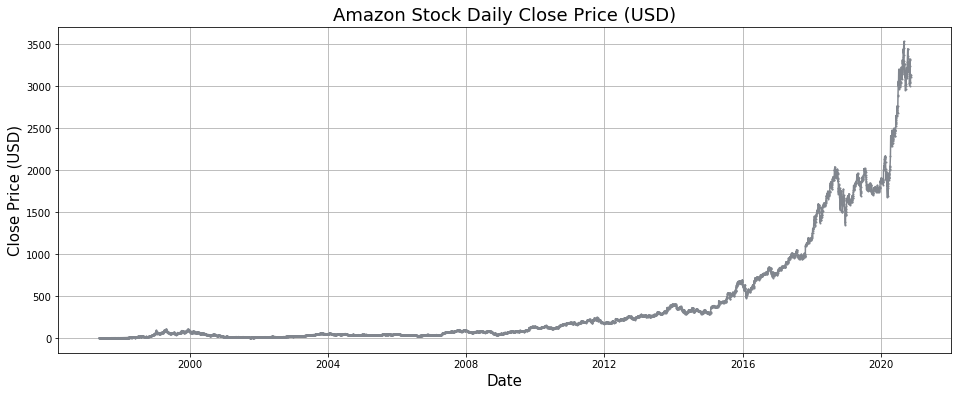

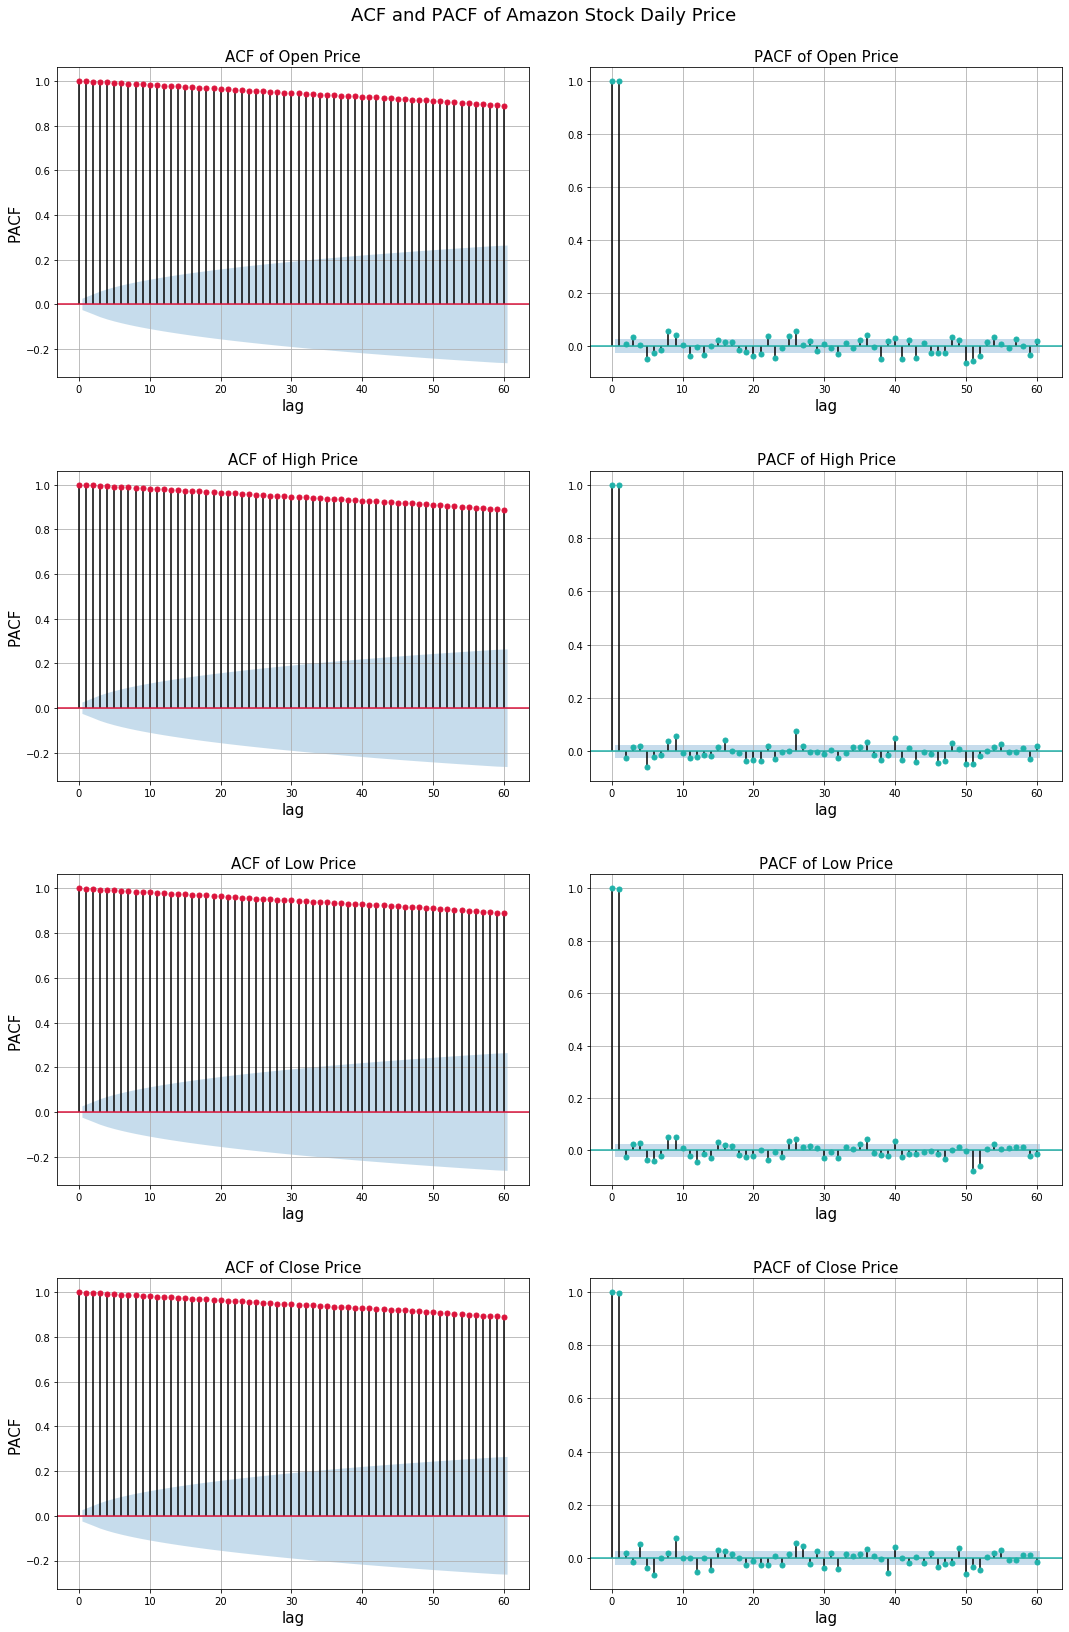

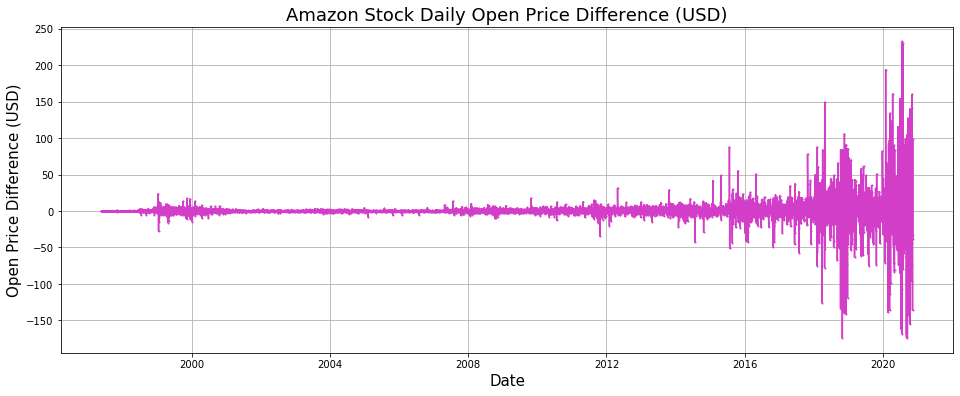

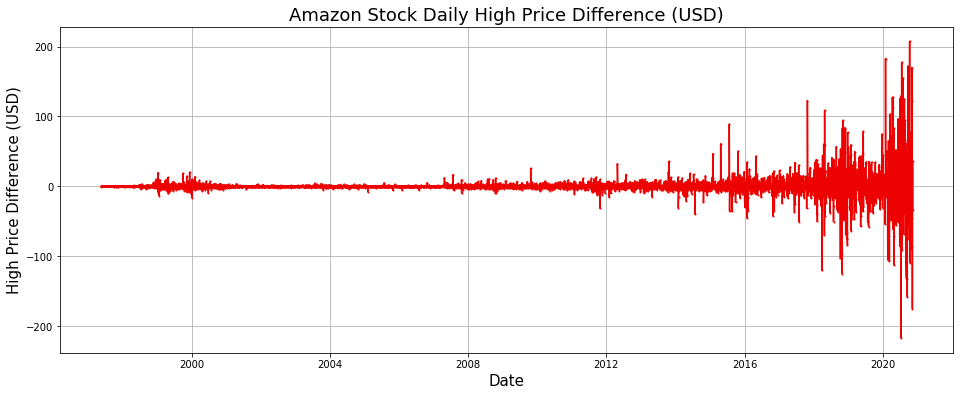

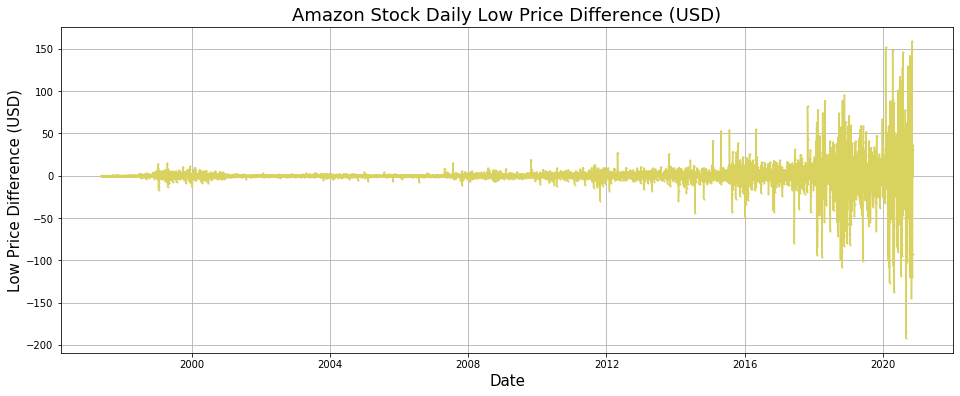

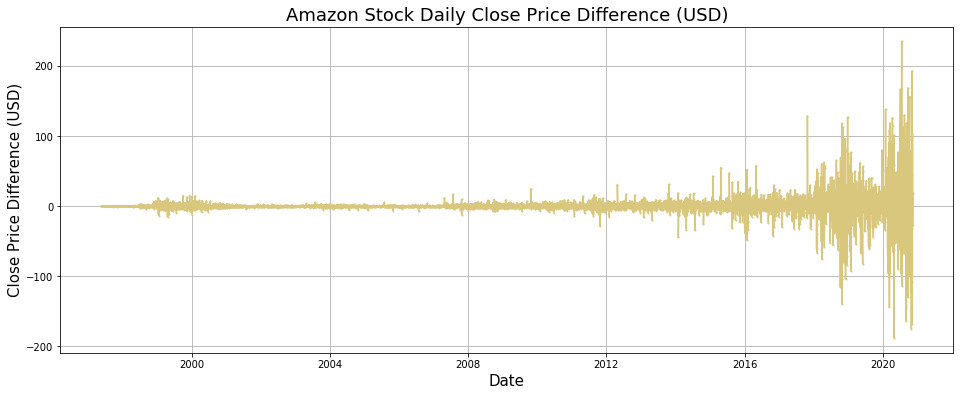

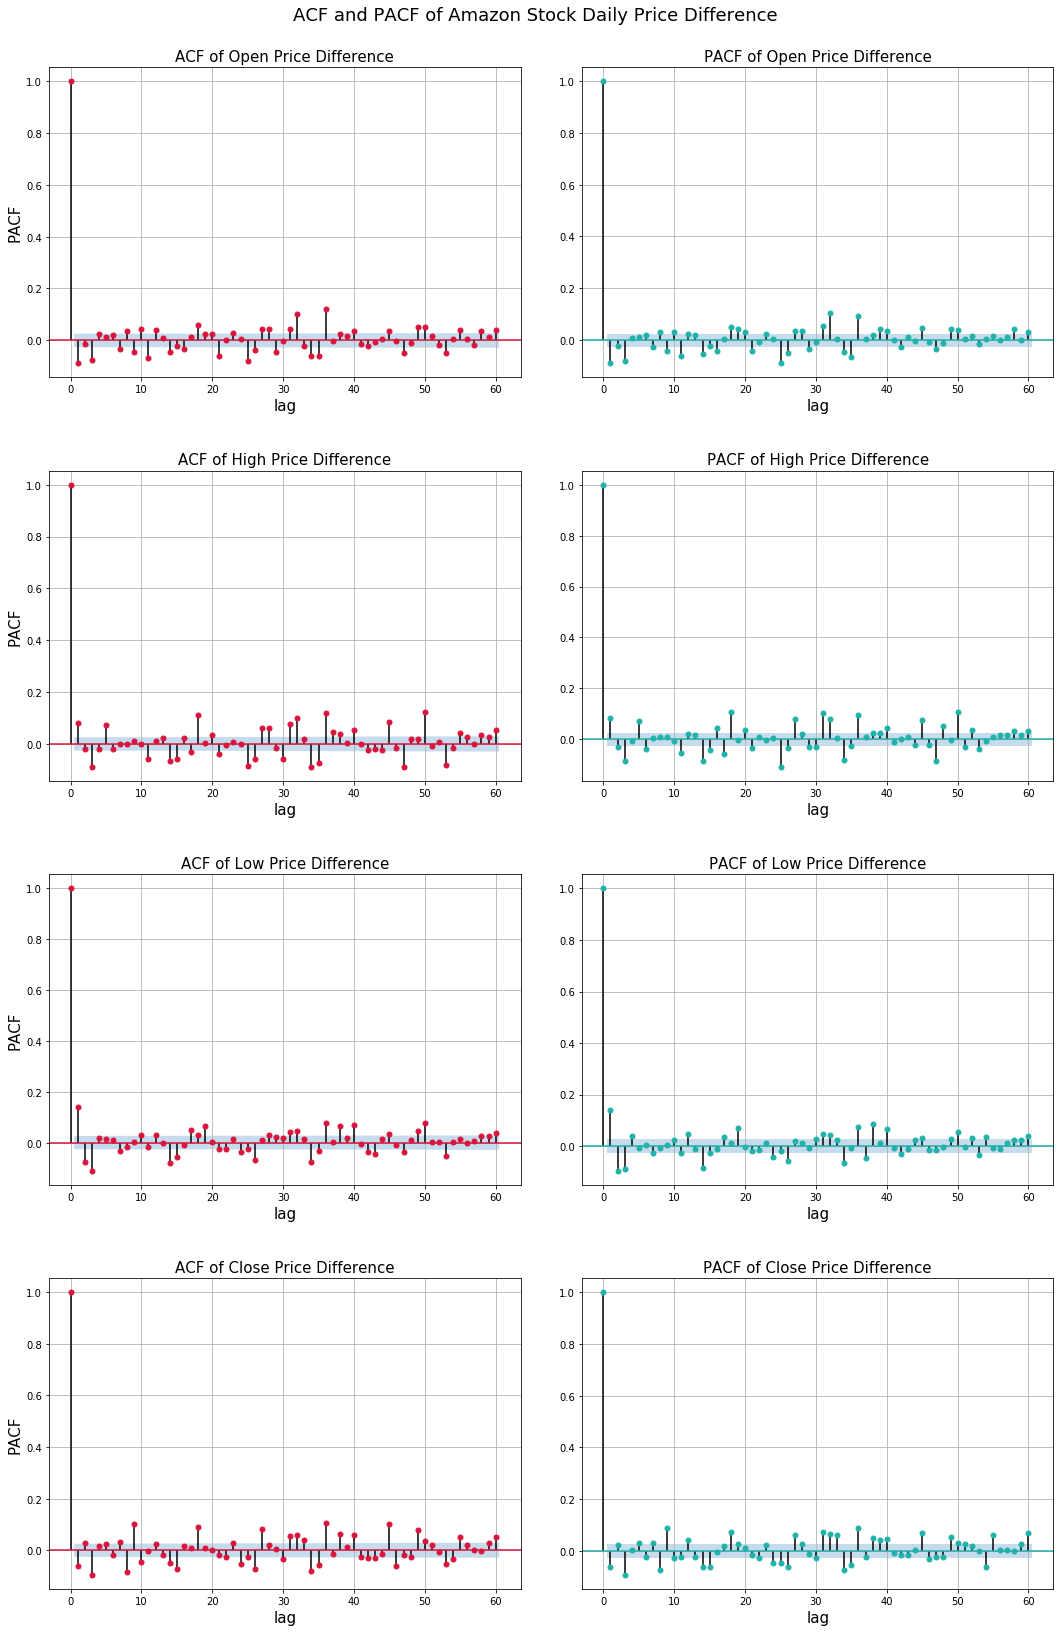


************************ Processing Microsoft Stock ************************

Number of observations: 8742 

Are there any missing values: No. 

Microsoft Stock - Vital Stats

               Open         High          Low        Close
count  8742.000000  8742.000000  8742.000000  8742.000000
mean     32.238631    32.592052    31.878109    32.244972
std      38.028387    38.430865    37.596115    38.035049
min       0.088542     0.092014     0.088542     0.090278
25%       3.736328     3.785156     3.690673     3.731446
50%      26.464374    26.750000    26.165000    26.451563
75%      35.468750    35.904688    35.000000    35.439374
max     229.270004   232.860001   227.350006   231.649994 

Microsoft Stock - Top Rows

                 Open      High       Low     Close
Date                                              
1986-03-13  0.088542  0.101563  0.088542  0.097222
1986-03-14  0.097222  0.102431  0.097222  0.100694
1986-03-17  0.100694  0.103299  0.100694  0.102431
1986-03-18  0.

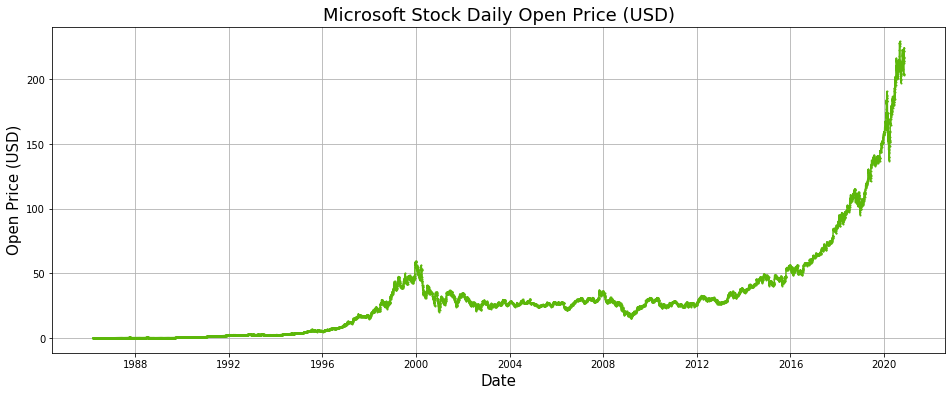

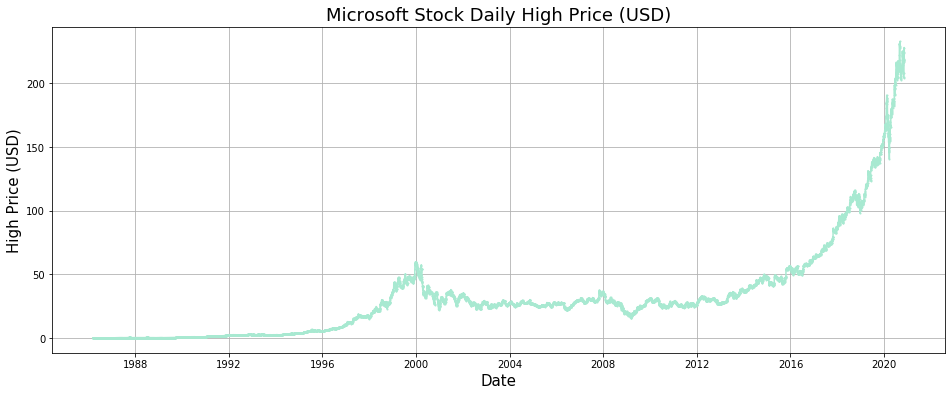

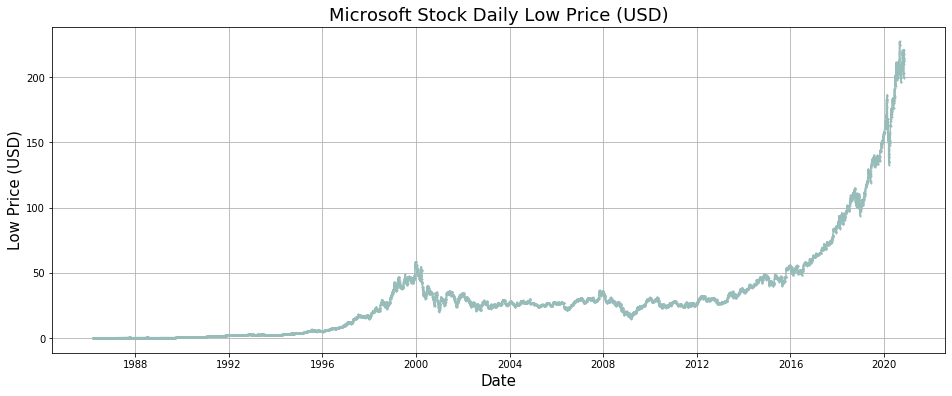

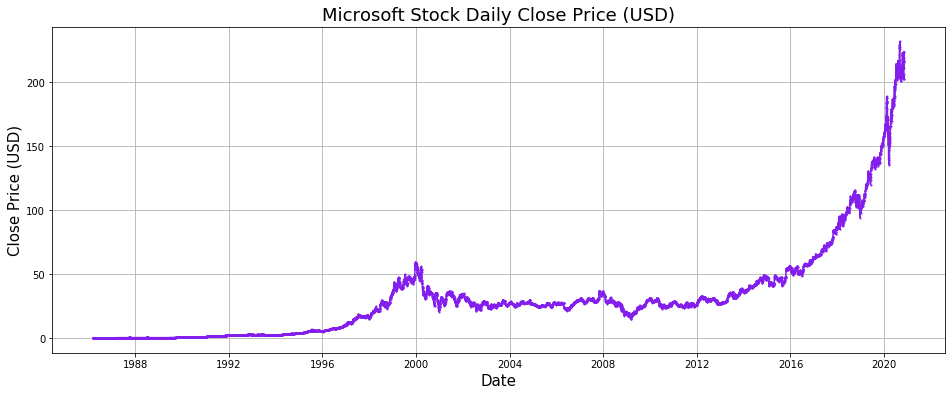

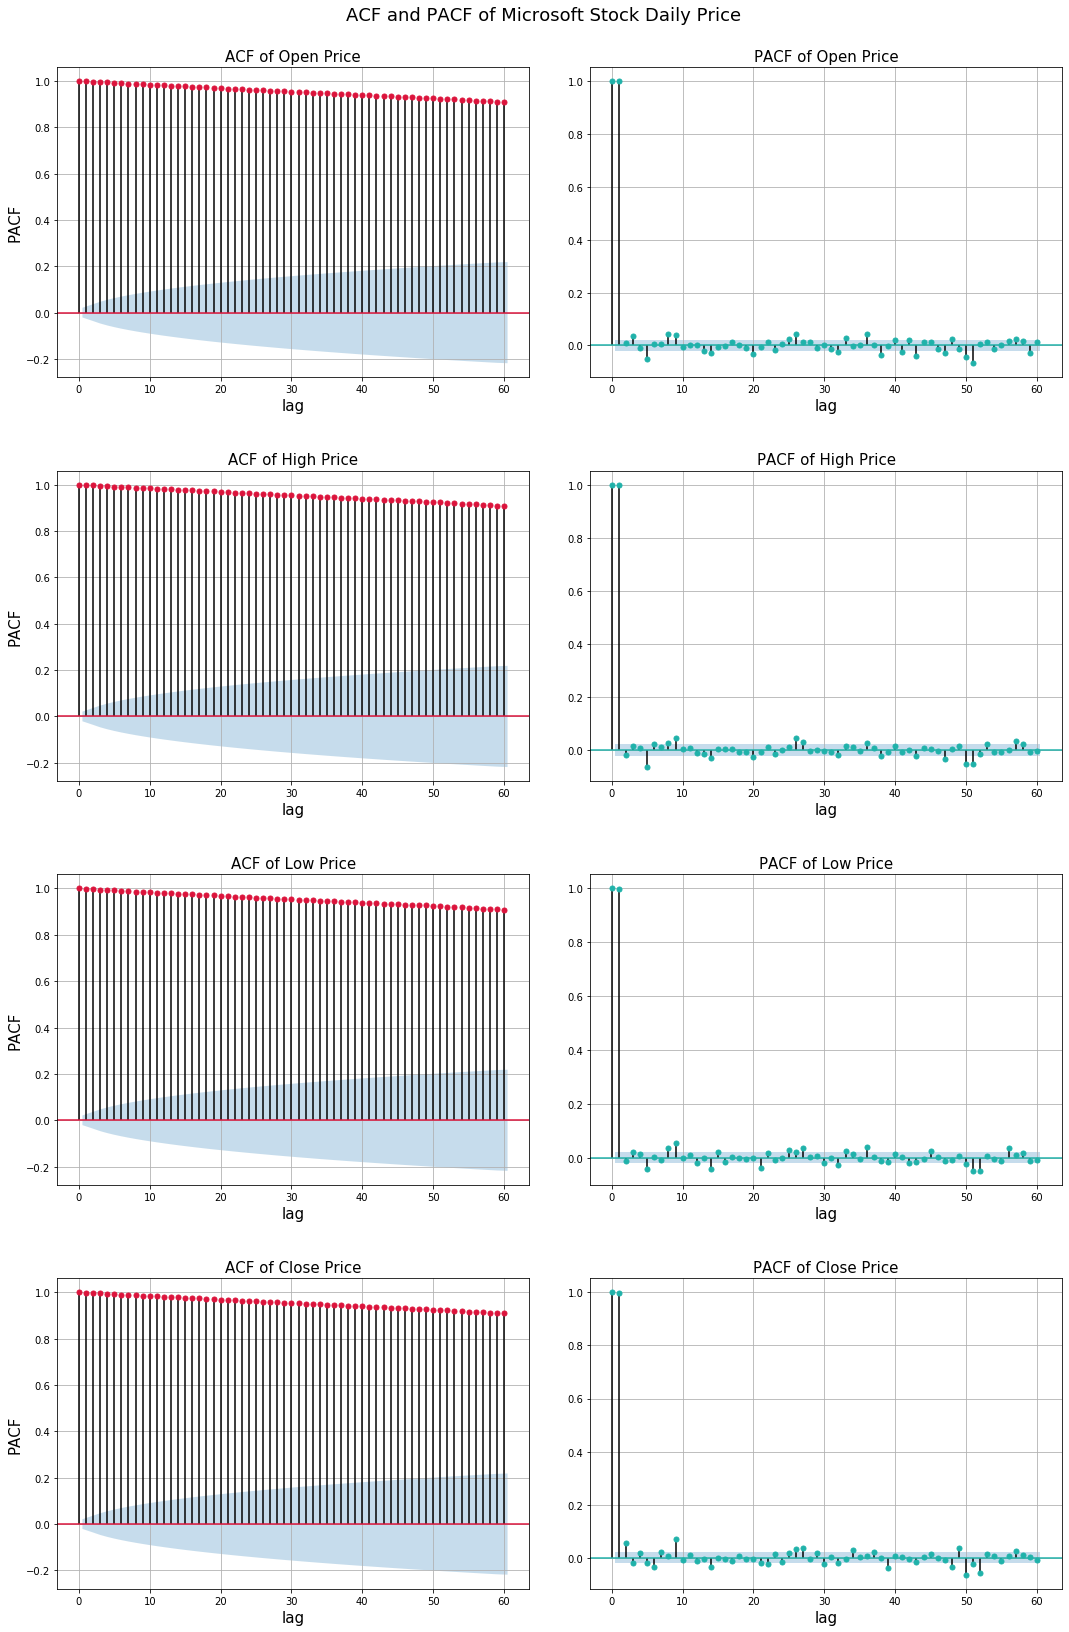

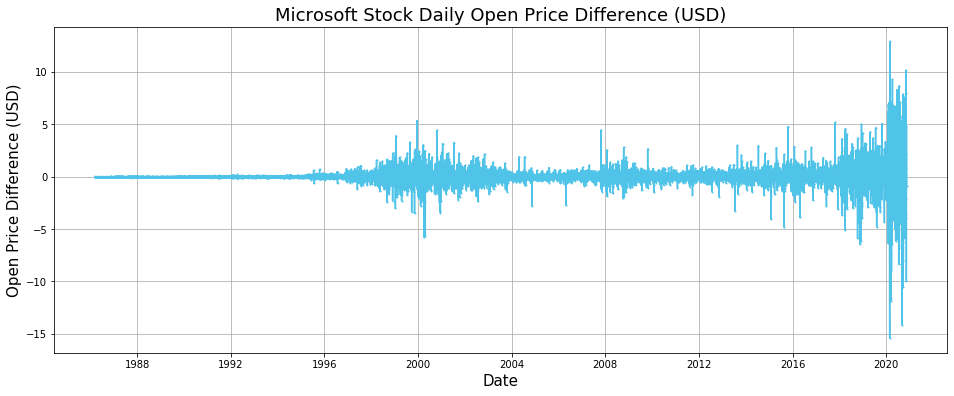

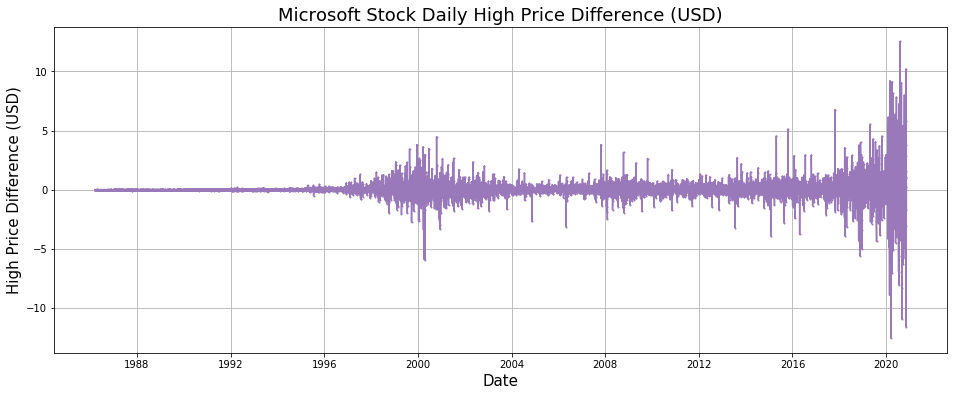

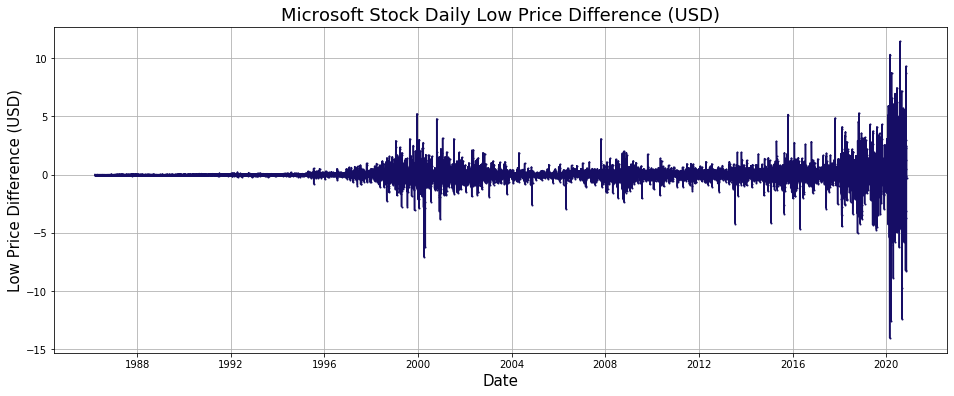

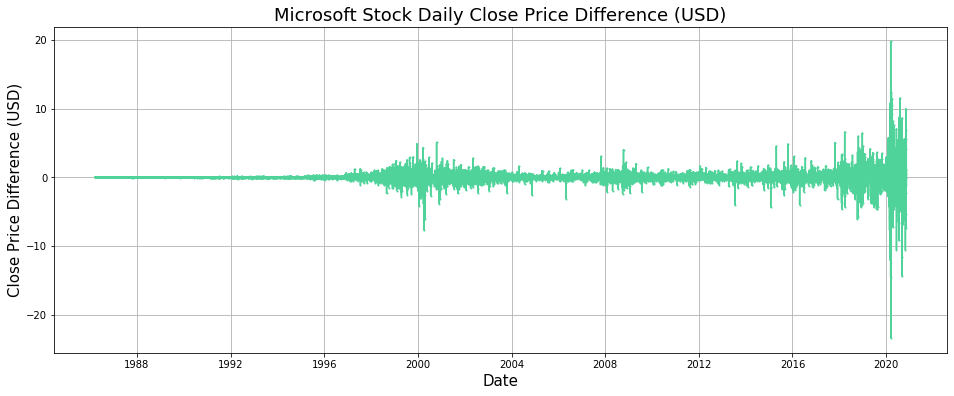

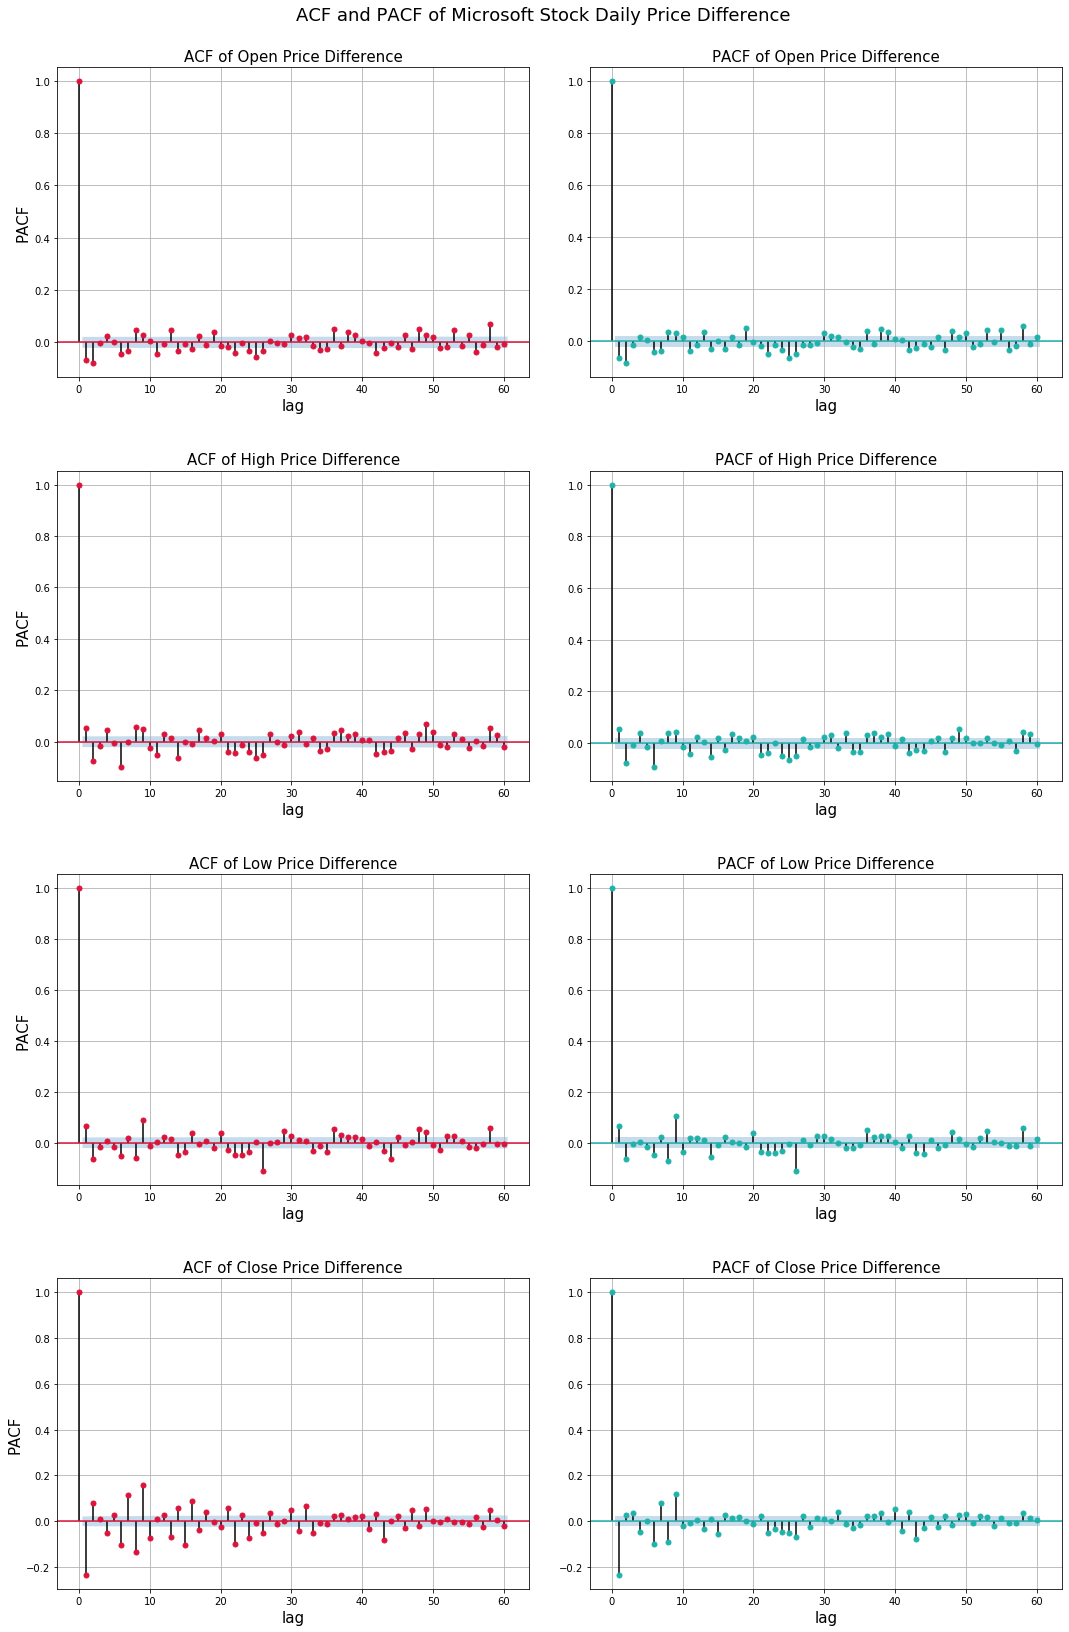


************************ Processing S&P 500 Index ************************

Number of observations: 23330 

Are there any missing values: No. 

S&P 500 Index - Vital Stats

                Open          High           Low         Close
count  23330.000000  23330.000000  23330.000000  23330.000000
mean     487.738629    490.614673    484.674568    487.835971
std      728.005388    731.951146    723.698442    728.098174
min        4.400000      4.400000      4.400000      4.400000
25%       23.860001     23.860001     23.860001     23.860001
50%       99.545002    100.325001     98.735000     99.545002
75%      835.272506    845.509995    825.180023    835.614975
max     3583.040039   3645.989990   3557.000000   3585.149902 

S&P 500 Index - Top Rows

                  Open       High        Low      Close
Date                                                  
1927-12-30  17.660000  17.660000  17.660000  17.660000
1928-01-03  17.760000  17.760000  17.760000  17.760000
1928-01-04  17.719

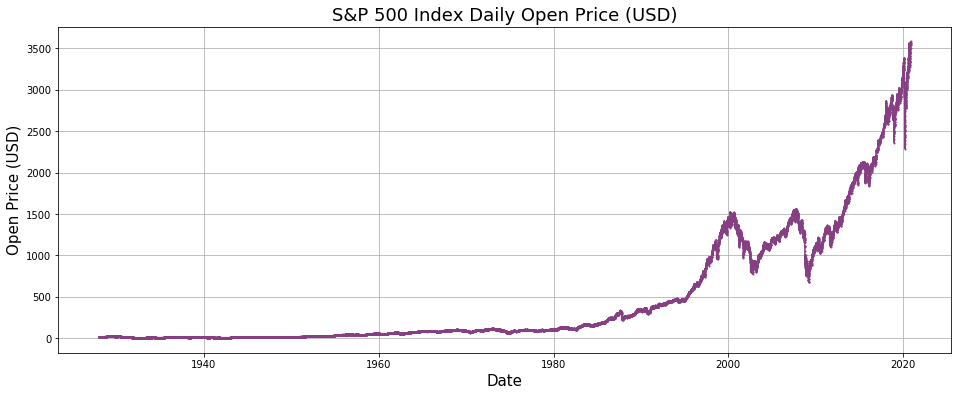

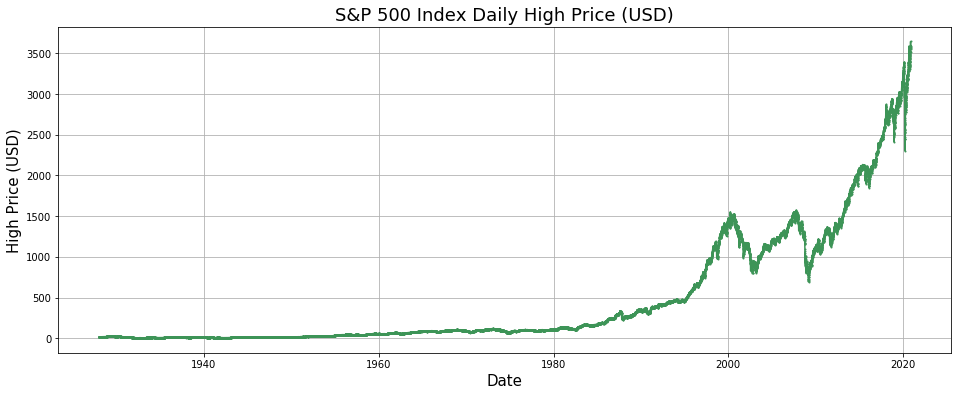

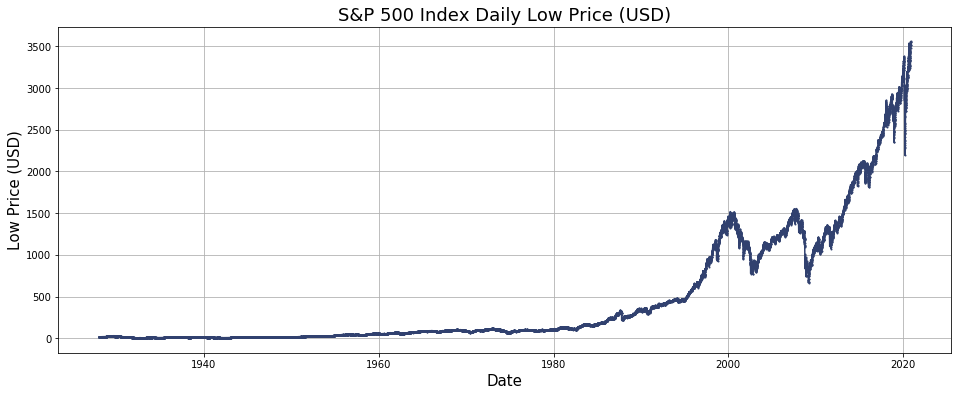

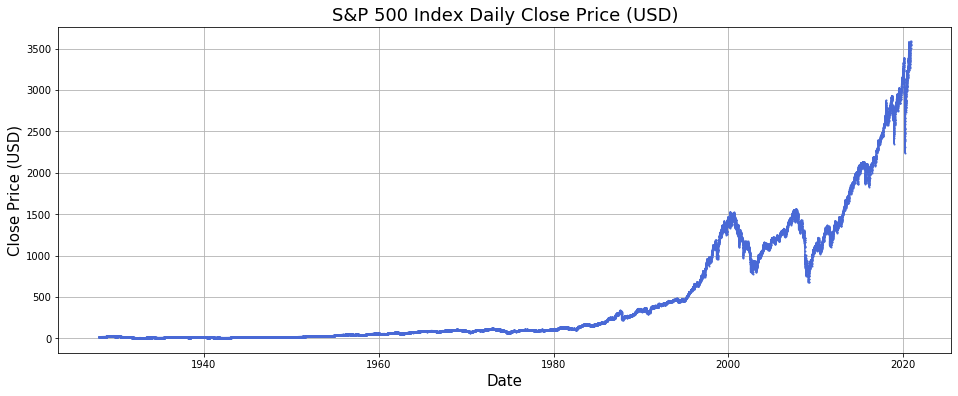

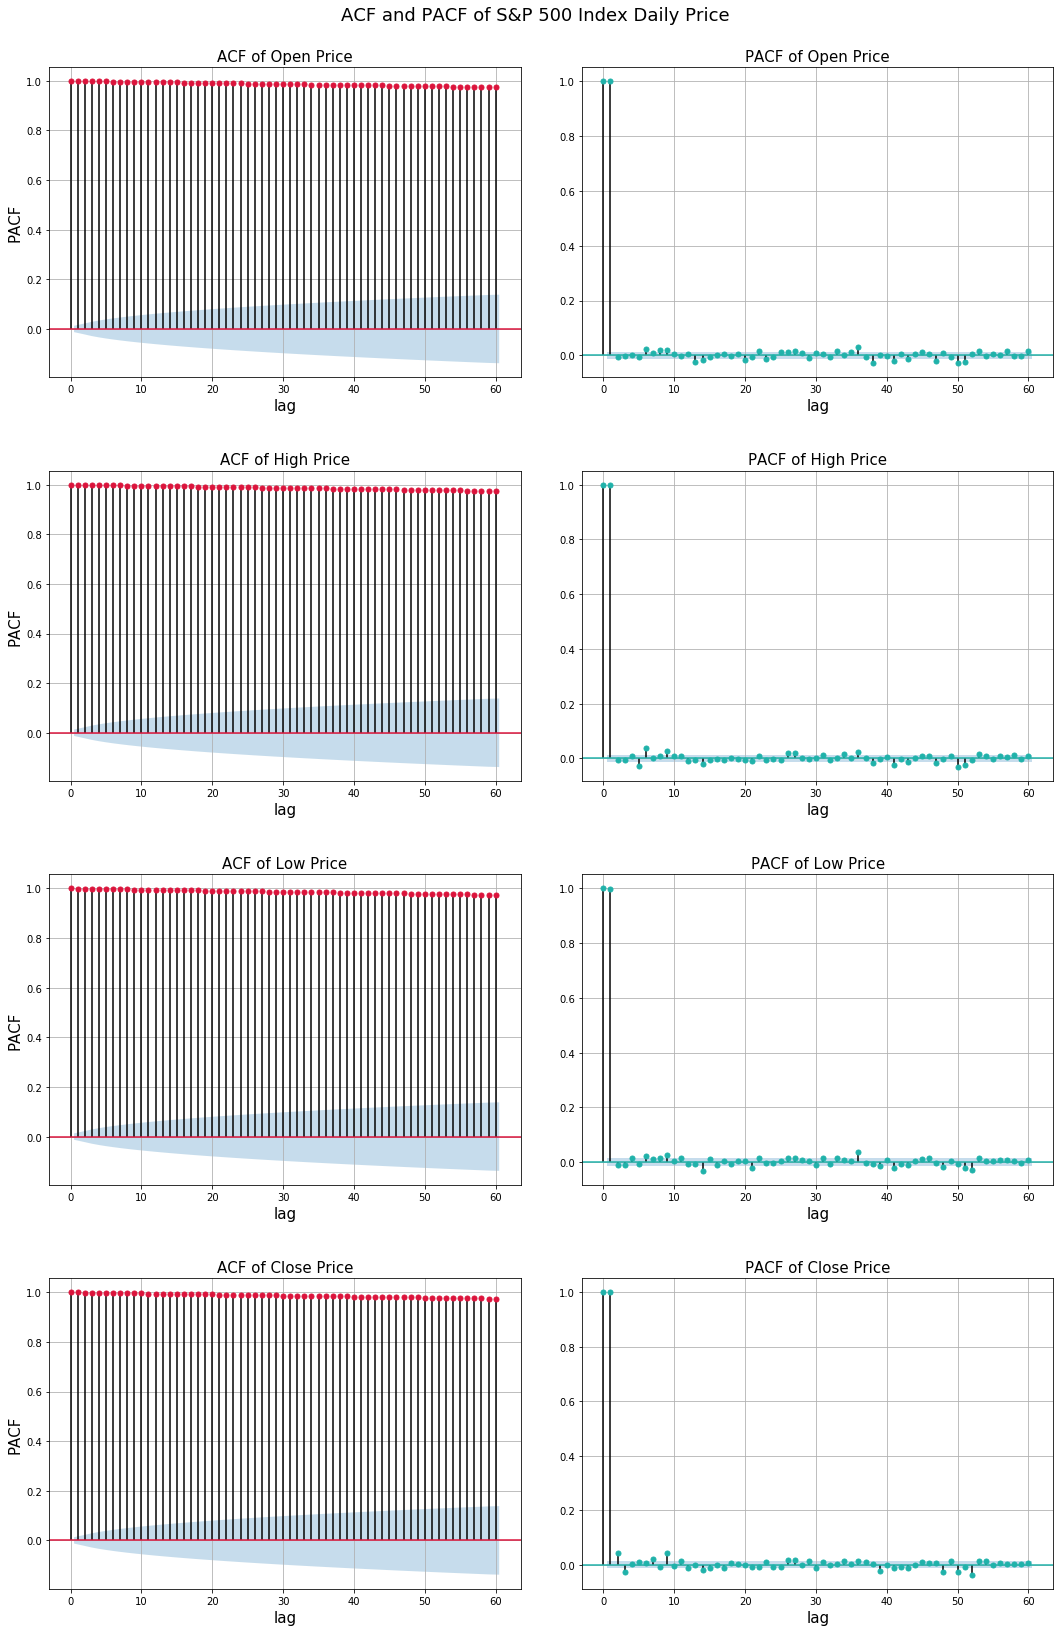

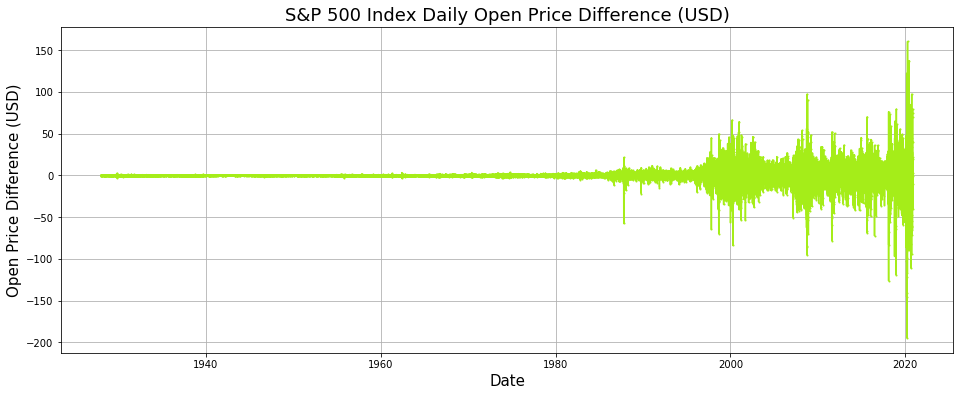

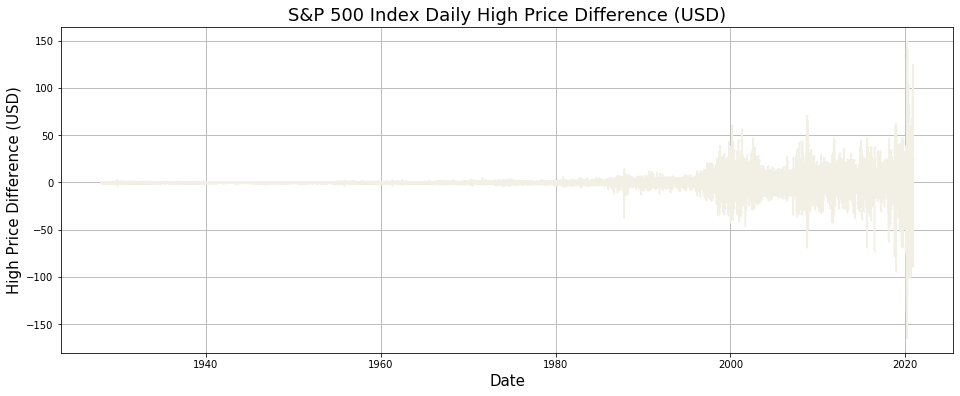

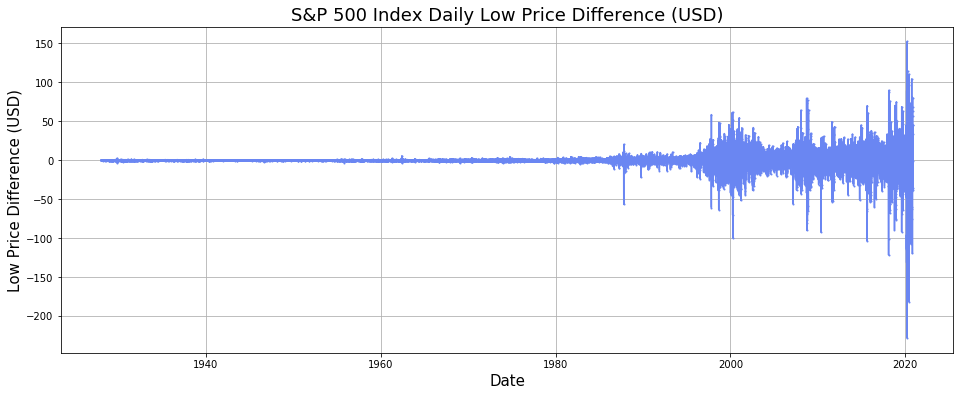

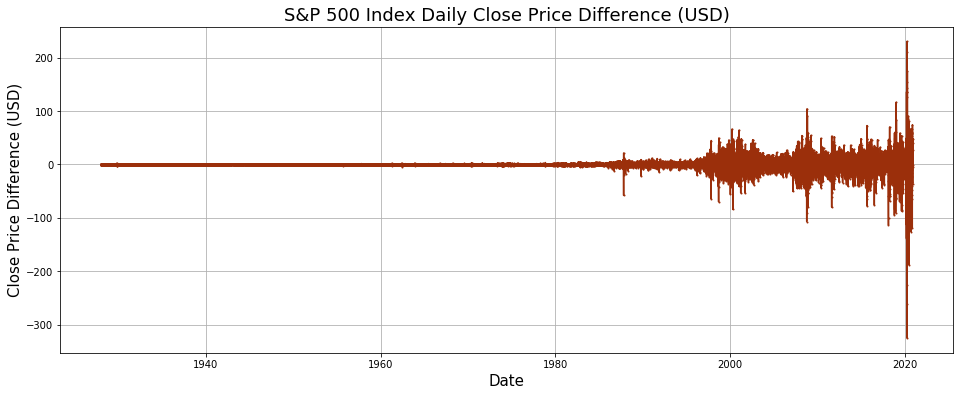

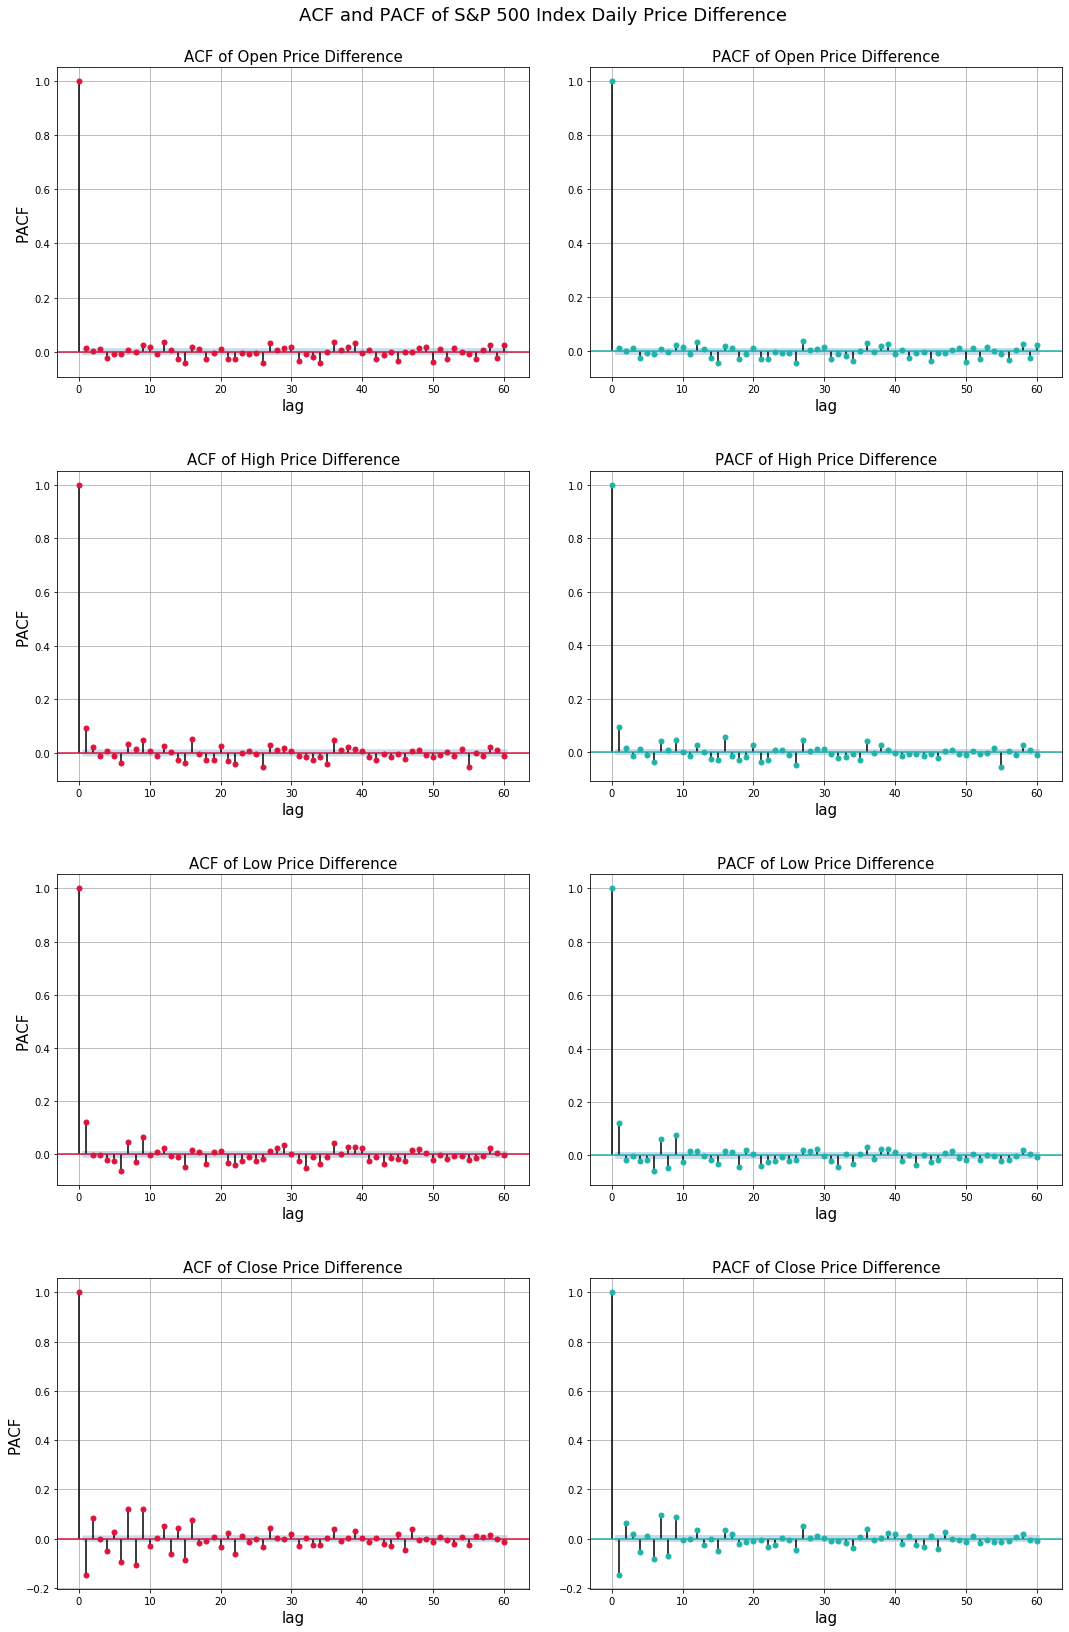


************************ Processing Nasdaq 100 Index ************************

Number of observations: 12556 

Are there any missing values: No. 

Nasdaq 100 Index - Vital Stats

                Open          High           Low         Close
count  12556.000000  12556.000000  12556.000000  12556.000000
mean    1864.904523   1877.171704   1850.808008   1864.789289
std     2214.578823   2229.253049   2197.872616   2214.688984
min       54.869999     54.869999     54.869999     54.869999
25%      246.612495    247.097504    246.230003    246.982498
50%     1047.915039   1052.240051   1041.580017   1047.010010
75%     2505.892578   2521.754944   2478.597595   2504.542542
max    12047.259766  12108.070313  11836.179688  12056.440430 

Nasdaq 100 Index - Top Rows

                   Open        High         Low       Close
Date                                                      
1971-02-05  100.000000  100.000000  100.000000  100.000000
1971-02-08  100.839996  100.839996  100.839996  100.

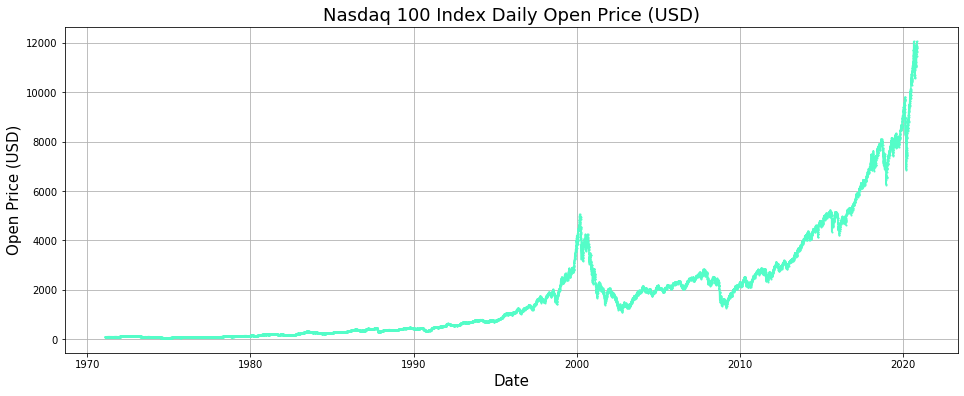

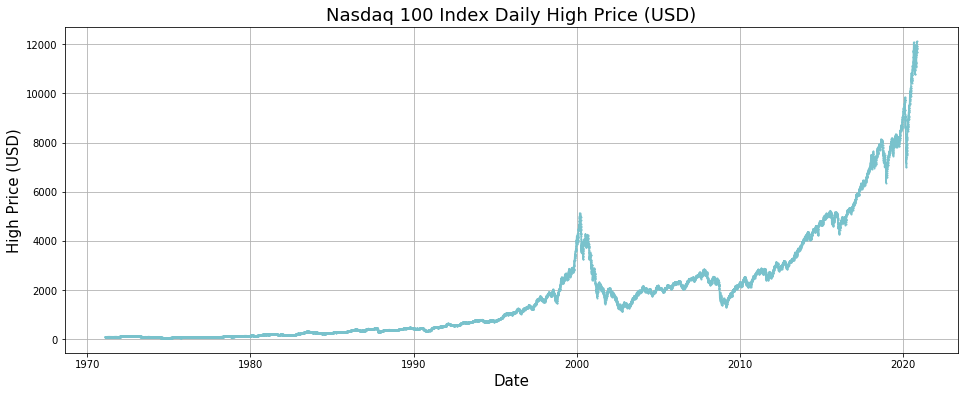

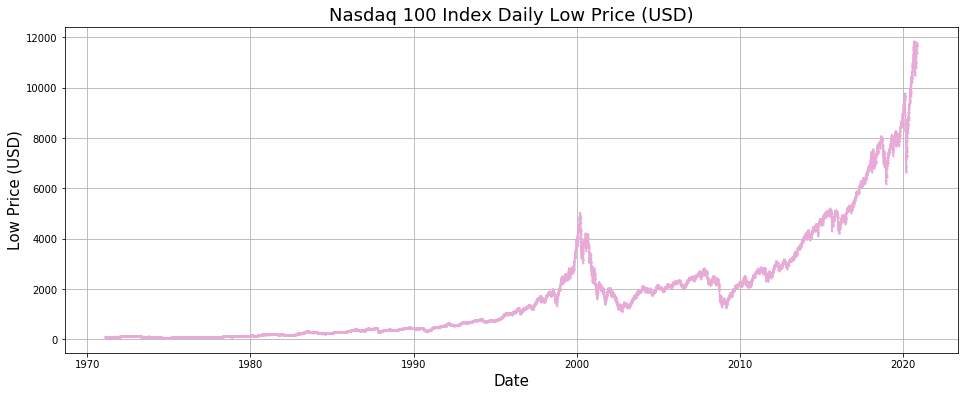

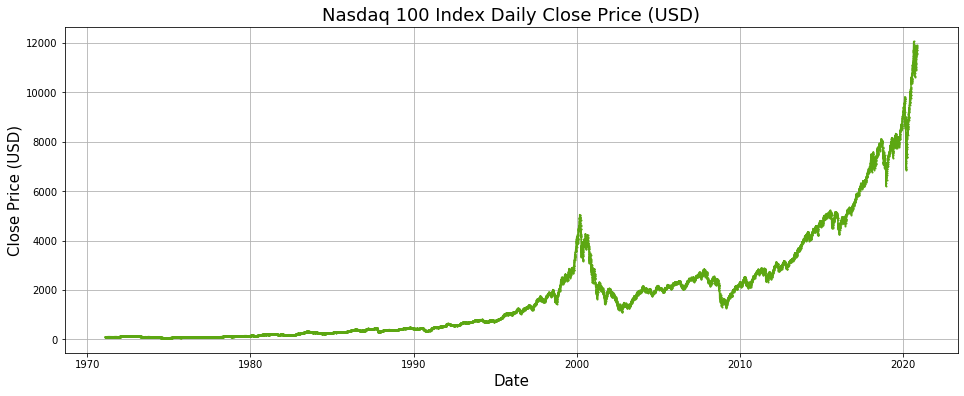

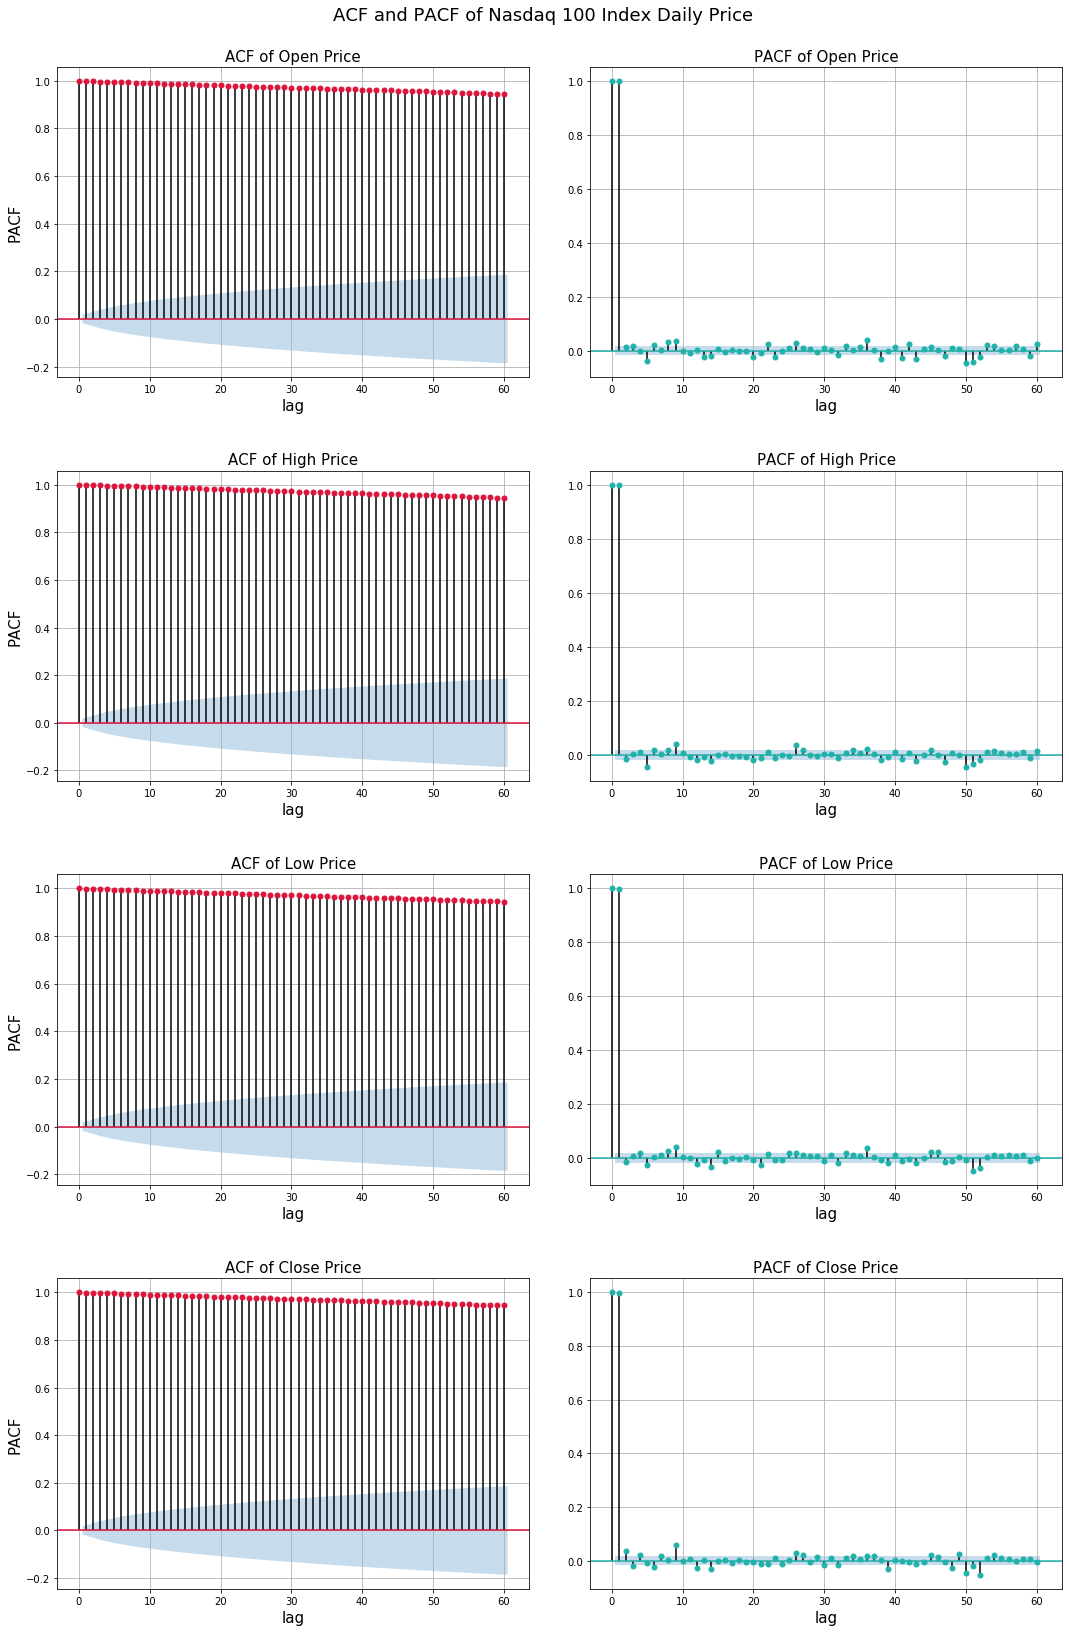

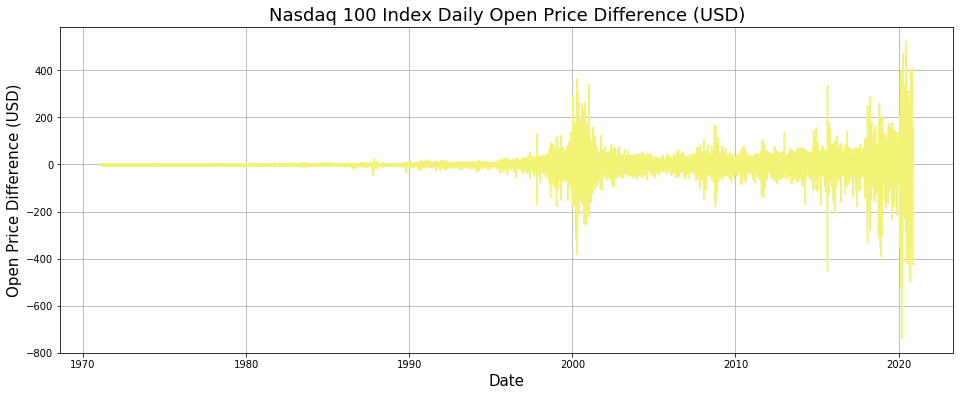

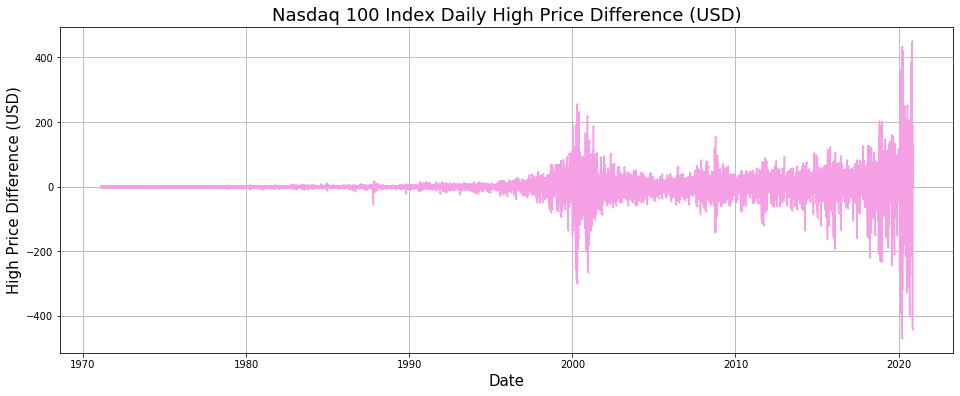

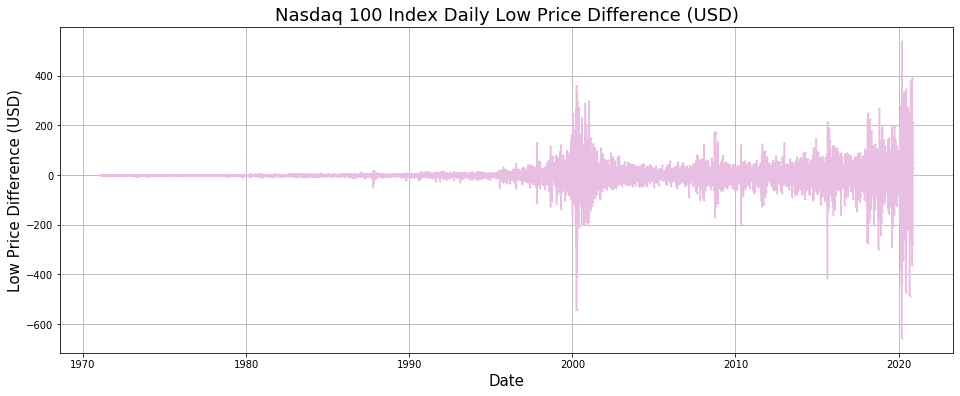

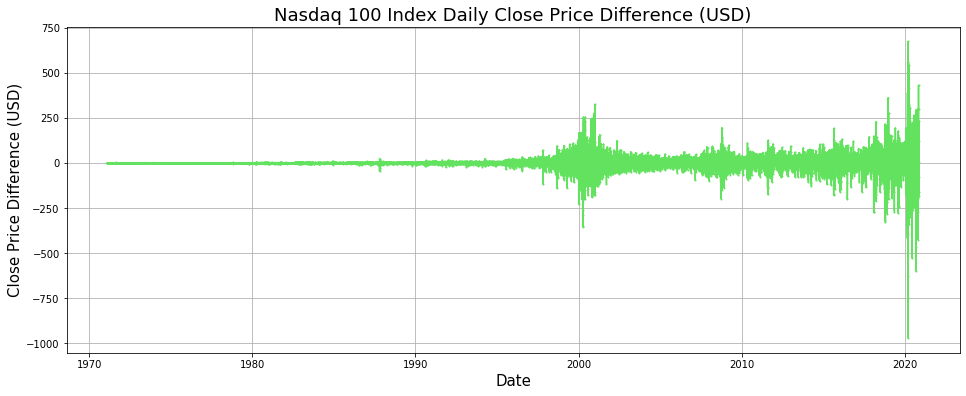

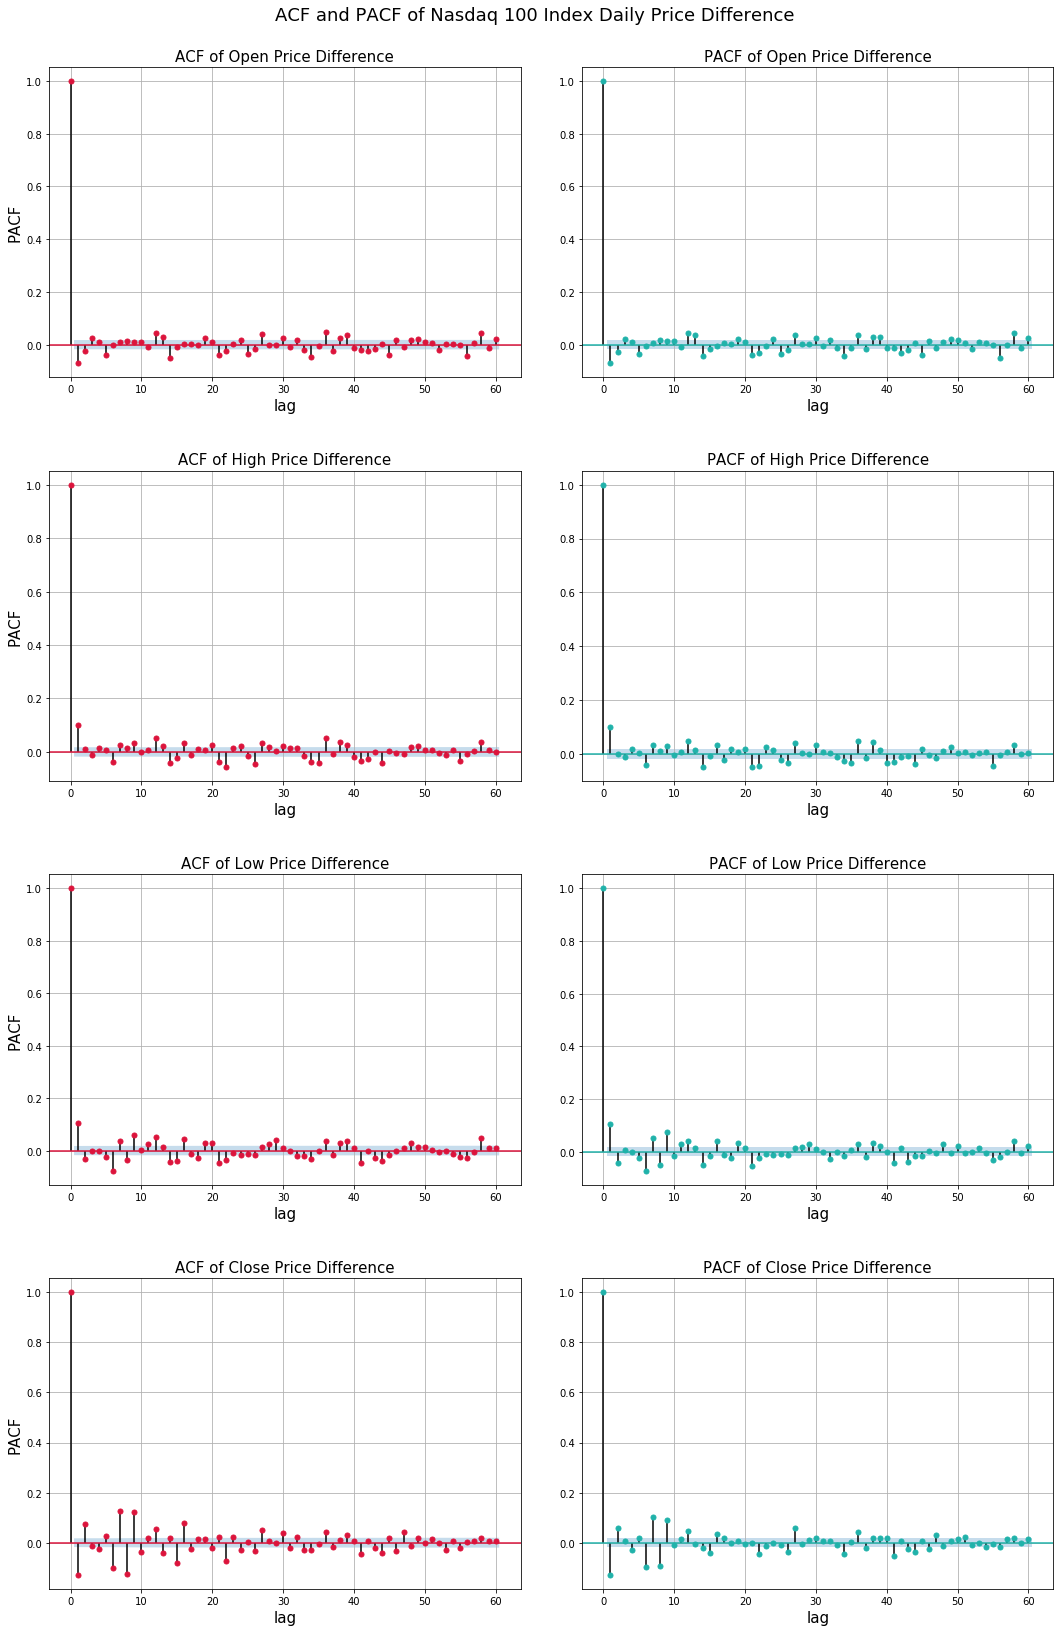

In [27]:
for i in range(len(security_list)):
    print("\n************************ Processing", security_list[i], "************************")

    df = read_data(data_dir + file_list[i]).dropna()
    df_diff = df.diff().dropna()
    describe_and_peek(df, security_list[i])

    display_charts(df, security_list[i], "Price")
    plot_acf_pacf(df, security_list[i], "Price")

    display_charts(df_diff, security_list[i], "Price Difference")
    plot_acf_pacf(df_diff, security_list[i], "Price Difference")